In [ ]:
from vectorhash import build_vectorhash_architecture
import torch
import torchvision
from torchvision import transforms
from vectorhash_functions import space_filling_curve
import matplotlib.pyplot as plt
from data_utils import prepare_data

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Lambda(lambda x: x.flatten())]
)

mnist = torchvision.datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)

vhash = build_vectorhash_architecture(
    shapes=[(3,3), (5,5), (7,7)],
    N_h=500,
    input_size=784,
    initalization_method="by_scaling",
    W_gh_var=1,
    percent_nonzero_relu=0.9,
    sparse_initialization=0.1,
    T=1e-3,
    device=torch.device("cpu"),
    hippocampal_sensory_layer_type="iterative_pseudoinverse",
    hidden_layer_factor=1,
    stationary=True,
    epsilon_hs=0.1,
    epsilon_sh=0.1,
)

num_imgs = 500

/Users/Ile-Maurice/Library/Python/3.10/lib/python/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  400


/Users/Ile-Maurice/Library/Python/3.10/lib/python/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
  0%|          | 0/500 [00:00<?, ?it/s]/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/hippocampal_sensory_layers.py:103: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  1 + input.T @ self.inhibition_matrix_hs @ input
/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash.py:70: UserWarning: Using a target size (torch.Size([1, 400])) that is different to the input size (torch.Size([400])). This will lik

info for each h directly after learning it
h max, min, mean tensor(5.9573) tensor(0.) tensor(0.9980)
h_from_s max, min, mean tensor(5.9571) tensor(0.) tensor(0.9980)
h_from_s_denoised max, min, mean tensor(4.7370) tensor(0.) tensor(0.8665)
avg nonzero/greaterzero h from book: tensor(245) tensor(245)
avg nonzero/greaterzero h from s: tensor(245) tensor(245)
avg nonzero/greaterzero h from s denoised: tensor(247) tensor(247)
mse/cosinesimilarity h from book and h from s tensor(2.0941e-09) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2154) tensor([0.9582])
mse/cosinesimilarity s and s from h from s tensor(3.2923e-09) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.0004) tensor([1.0000])
mse/cosinesimilarity s and s from h tensor(3.1534e-09) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(5.4168) tensor(0.) tensor(0.9740)
h_from_s max, min, mean tensor(5.4165) tensor(0.) tensor(0.9740)
h_fr

  9%|▉         | 44/500 [00:00<00:03, 142.35it/s]

info for each h directly after learning it
h max, min, mean tensor(4.7807) tensor(0.) tensor(0.8807)
h_from_s max, min, mean tensor(4.7805) tensor(0.) tensor(0.8807)
h_from_s_denoised max, min, mean tensor(4.4876) tensor(0.) tensor(0.7667)
avg nonzero/greaterzero h from book: tensor(238) tensor(238)
avg nonzero/greaterzero h from s: tensor(380) tensor(380)
avg nonzero/greaterzero h from s denoised: tensor(247) tensor(247)
mse/cosinesimilarity h from book and h from s tensor(1.8516e-08) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2704) tensor([0.9355])
mse/cosinesimilarity s and s from h from s tensor(5.7956e-07) tensor([1.])
mse/cosinesimilarity s and s from h from s denoised tensor(0.2052) tensor([0.8964])
mse/cosinesimilarity s and s from h tensor(4.4100e-07) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(5.4110) tensor(0.) tensor(0.9147)
h_from_s max, min, mean tensor(5.4103) tensor(0.) tensor(0.9147)
h_from_s_den

 13%|█▎        | 66/500 [00:00<00:02, 167.85it/s]

info for each h directly after learning it
h max, min, mean tensor(5.4626) tensor(0.) tensor(0.9713)
h_from_s max, min, mean tensor(5.4623) tensor(0.) tensor(0.9713)
h_from_s_denoised max, min, mean tensor(4.8261) tensor(0.) tensor(0.8556)
avg nonzero/greaterzero h from book: tensor(248) tensor(248)
avg nonzero/greaterzero h from s: tensor(365) tensor(365)
avg nonzero/greaterzero h from s denoised: tensor(263) tensor(263)
mse/cosinesimilarity h from book and h from s tensor(2.4791e-08) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.1948) tensor([0.9630])
mse/cosinesimilarity s and s from h from s tensor(5.6328e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.1894) tensor([0.9030])
mse/cosinesimilarity s and s from h tensor(5.5904e-07) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(5.4712) tensor(0.) tensor(0.9656)
h_from_s max, min, mean tensor(5.4706) tensor(0.) tensor(0.9656)
h_from_s

 18%|█▊        | 89/500 [00:00<00:02, 187.00it/s]

info for each h directly after learning it
h max, min, mean tensor(5.5857) tensor(0.) tensor(0.9237)
h_from_s max, min, mean tensor(5.5845) tensor(0.) tensor(0.9237)
h_from_s_denoised max, min, mean tensor(4.2909) tensor(0.) tensor(0.8400)
avg nonzero/greaterzero h from book: tensor(236) tensor(236)
avg nonzero/greaterzero h from s: tensor(386) tensor(386)
avg nonzero/greaterzero h from s denoised: tensor(237) tensor(237)
mse/cosinesimilarity h from book and h from s tensor(8.9640e-08) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2351) tensor([0.9508])
mse/cosinesimilarity s and s from h from s tensor(9.4057e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.2340) tensor([0.8859])
mse/cosinesimilarity s and s from h tensor(8.3193e-07) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(6.7979) tensor(0.) tensor(0.9896)
h_from_s max, min, mean tensor(6.7972) tensor(0.) tensor(0.9896)
h_from_s

 22%|██▏       | 112/500 [00:00<00:01, 198.36it/s]

info for each h directly after learning it
h max, min, mean tensor(6.1547) tensor(0.) tensor(1.0074)
h_from_s max, min, mean tensor(6.1533) tensor(0.) tensor(1.0074)
h_from_s_denoised max, min, mean tensor(5.2142) tensor(0.) tensor(0.8910)
avg nonzero/greaterzero h from book: tensor(248) tensor(248)
avg nonzero/greaterzero h from s: tensor(393) tensor(393)
avg nonzero/greaterzero h from s denoised: tensor(257) tensor(257)
mse/cosinesimilarity h from book and h from s tensor(1.1819e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2008) tensor([0.9629])
mse/cosinesimilarity s and s from h from s tensor(1.4734e-06) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.2896) tensor([0.8426])
mse/cosinesimilarity s and s from h tensor(1.4575e-06) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(5.2351) tensor(0.) tensor(0.9205)
h_from_s max, min, mean tensor(5.2347) tensor(0.) tensor(0.9205)
h_from_s

 27%|██▋       | 136/500 [00:00<00:01, 208.94it/s]

tensor(0.7878)
avg nonzero/greaterzero h from book: tensor(238) tensor(238)
avg nonzero/greaterzero h from s: tensor(374) tensor(374)
avg nonzero/greaterzero h from s denoised: tensor(237) tensor(237)
mse/cosinesimilarity h from book and h from s tensor(5.2706e-08) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.1518) tensor([0.9709])
mse/cosinesimilarity s and s from h from s tensor(5.1438e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.2604) tensor([0.8601])
mse/cosinesimilarity s and s from h tensor(3.7540e-07) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(6.9513) tensor(0.) tensor(0.9484)
h_from_s max, min, mean tensor(6.9502) tensor(0.) tensor(0.9484)
h_from_s_denoised max, min, mean tensor(5.6066) tensor(0.) tensor(0.8330)
avg nonzero/greaterzero h from book: tensor(243) tensor(243)
avg nonzero/greaterzero h from s: tensor(380) tensor(380)
avg nonzero/greaterzero h from s denoise

 32%|███▏      | 158/500 [00:00<00:02, 165.83it/s]

info for each h directly after learning it
h max, min, mean tensor(6.1726) tensor(0.) tensor(1.0130)
h_from_s max, min, mean tensor(6.1712) tensor(0.) tensor(1.0130)
h_from_s_denoised max, min, mean tensor(5.3184) tensor(0.) tensor(0.9046)
avg nonzero/greaterzero h from book: tensor(238) tensor(238)
avg nonzero/greaterzero h from s: tensor(375) tensor(375)
avg nonzero/greaterzero h from s denoised: tensor(248) tensor(248)
mse/cosinesimilarity h from book and h from s tensor(2.0309e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2208) tensor([0.9586])
mse/cosinesimilarity s and s from h from s tensor(1.4025e-06) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.2828) tensor([0.8618])
mse/cosinesimilarity s and s from h tensor(1.0543e-06) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(4.7420) tensor(0.) tensor(0.8415)
h_from_s max, min, mean tensor(4.7413) tensor(0.) tensor(0.8415)
h_from_s

 36%|███▌      | 179/500 [00:00<00:01, 176.94it/s]

info for each h directly after learning it
h max, min, mean tensor(5.3942) tensor(0.) tensor(0.9789)
h_from_s max, min, mean tensor(5.3927) tensor(0.) tensor(0.9789)
h_from_s_denoised max, min, mean tensor(4.4680) tensor(0.) tensor(0.8677)
avg nonzero/greaterzero h from book: tensor(238) tensor(238)
avg nonzero/greaterzero h from s: tensor(383) tensor(383)
avg nonzero/greaterzero h from s denoised: tensor(250) tensor(250)
mse/cosinesimilarity h from book and h from s tensor(2.3714e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.1250) tensor([0.9788])
mse/cosinesimilarity s and s from h from s tensor(2.6157e-06) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.1242) tensor([0.9363])
mse/cosinesimilarity s and s from h tensor(2.3255e-06) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(4.9074) tensor(0.) tensor(0.9253)
h_from_s max, min, mean tensor(4.9060) tensor(0.) tensor(0.9253)
h_fr

 40%|████      | 200/500 [00:01<00:01, 185.06it/s]

info for each h directly after learning it
h max, min, mean tensor(5.2482) tensor(0.) tensor(0.8915)
h_from_s max, min, mean tensor(5.2472) tensor(0.) tensor(0.8916)
h_from_s_denoised max, min, mean tensor(4.3400) tensor(0.) tensor(0.7611)
avg nonzero/greaterzero h from book: tensor(236) tensor(236)
avg nonzero/greaterzero h from s: tensor(379) tensor(379)
avg nonzero/greaterzero h from s denoised: tensor(237) tensor(237)
mse/cosinesimilarity h from book and h from s tensor(1.0039e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2554) tensor([0.9437])
mse/cosinesimilarity s and s from h from s tensor(3.3100e-06) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.3049) tensor([0.8453])
mse/cosinesimilarity s and s from h tensor(2.2628e-06) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(6.0900) tensor(0.) tensor(0.8753)
h_from_s max, min, mean tensor(6.0888) tensor(0.) tensor(0.8754)
h_fr

 44%|████▍     | 222/500 [00:01<00:01, 193.05it/s]

info for each h directly after learning it
h max, min, mean tensor(5.1477) tensor(0.) tensor(0.9929)
h_from_s max, min, mean tensor(5.1455) tensor(0.) tensor(0.9929)
h_from_s_denoised max, min, mean tensor(4.6962) tensor(0.) tensor(0.8978)
avg nonzero/greaterzero h from book: tensor(244) tensor(244)
avg nonzero/greaterzero h from s: tensor(382) tensor(382)
avg nonzero/greaterzero h from s denoised: tensor(245) tensor(245)
mse/cosinesimilarity h from book and h from s tensor(8.1785e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.1150) tensor([0.9814])
mse/cosinesimilarity s and s from h from s tensor(3.0310e-06) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.3984) tensor([0.8414])
mse/cosinesimilarity s and s from h tensor(6.8196e-07) tensor([1.])
info for each h directly after learning it
h max, min, mean tensor(6.1977) tensor(0.) tensor(0.8860)
h_from_s max, min, mean tensor(6.1961) tensor(0.) tensor(0.8861)
h_from_s

 49%|████▉     | 246/500 [00:01<00:01, 203.94it/s]

tensor(5.0734) tensor(0.) tensor(0.9744)
h_from_s_denoised max, min, mean tensor(4.2570) tensor(0.) tensor(0.8449)
avg nonzero/greaterzero h from book: tensor(242) tensor(242)
avg nonzero/greaterzero h from s: tensor(368) tensor(368)
avg nonzero/greaterzero h from s denoised: tensor(258) tensor(258)
mse/cosinesimilarity h from book and h from s tensor(1.2765e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2656) tensor([0.9438])
mse/cosinesimilarity s and s from h from s tensor(2.4442e-06) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.9046) tensor([0.6528])
mse/cosinesimilarity s and s from h tensor(1.6563e-06) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(5.6966) tensor(0.) tensor(0.9752)
h_from_s max, min, mean tensor(5.6956) tensor(0.) tensor(0.9752)
h_from_s_denoised max, min, mean tensor(4.5350) tensor(0.) tensor(0.8762)
avg nonzero/greaterzero h from book: tensor(251) tensor

 54%|█████▍    | 269/500 [00:01<00:01, 210.30it/s]

info for each h directly after learning it
h max, min, mean tensor(5.3190) tensor(0.) tensor(0.9801)
h_from_s max, min, mean tensor(5.3176) tensor(0.) tensor(0.9801)
h_from_s_denoised max, min, mean tensor(4.2895) tensor(0.) tensor(0.8432)
avg nonzero/greaterzero h from book: tensor(254) tensor(254)
avg nonzero/greaterzero h from s: tensor(370) tensor(370)
avg nonzero/greaterzero h from s denoised: tensor(258) tensor(258)
mse/cosinesimilarity h from book and h from s tensor(2.7065e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2492) tensor([0.9492])
mse/cosinesimilarity s and s from h from s tensor(8.0403e-06) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(0.6245) tensor([0.7401])
mse/cosinesimilarity s and s from h tensor(8.0004e-06) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(6.1987) tensor(0.) tensor(0.8344)
h_from_s max, min, mean tensor(6.1967) tensor(0.) tensor(0.8344)
h_from_s

 58%|█████▊    | 291/500 [00:01<00:01, 193.25it/s]

info for each h directly after learning it
h max, min, mean tensor(6.7673) tensor(0.) tensor(0.8881)
h_from_s max, min, mean tensor(6.7647) tensor(0.) tensor(0.8882)
h_from_s_denoised max, min, mean tensor(4.9695) tensor(0.) tensor(0.8149)
avg nonzero/greaterzero h from book: tensor(234) tensor(234)
avg nonzero/greaterzero h from s: tensor(380) tensor(380)
avg nonzero/greaterzero h from s denoised: tensor(249) tensor(249)
mse/cosinesimilarity h from book and h from s tensor(3.0797e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2816) tensor([0.9338])
mse/cosinesimilarity s and s from h from s tensor(1.1591e-05) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(1.0108) tensor([0.6125])
mse/cosinesimilarity s and s from h tensor(9.0856e-06) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(6.7025) tensor(0.) tensor(0.9204)
h_from_s max, min, mean tensor(6.7007) tensor(0.) tensor(0.9205)
h_from_s

 63%|██████▎   | 314/500 [00:01<00:00, 202.01it/s]

tensor(0.2849) tensor([0.9368])
mse/cosinesimilarity s and s from h from s tensor(3.1190e-05) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(1.5259) tensor([0.5324])
mse/cosinesimilarity s and s from h tensor(2.8752e-05) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(5.6662) tensor(0.) tensor(0.9056)
h_from_s max, min, mean tensor(5.6636) tensor(0.) tensor(0.9056)
h_from_s_denoised max, min, mean tensor(4.7113) tensor(0.) tensor(0.8125)
avg nonzero/greaterzero h from book: tensor(239) tensor(239)
avg nonzero/greaterzero h from s: tensor(358) tensor(358)
avg nonzero/greaterzero h from s denoised: tensor(255) tensor(255)
mse/cosinesimilarity h from book and h from s tensor(5.4628e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2762) tensor([0.9373])
mse/cosinesimilarity s and s from h from s tensor(3.9100e-05) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(

 67%|██████▋   | 337/500 [00:01<00:00, 209.13it/s]

info for each h directly after learning it
h max, min, mean tensor(5.9975) tensor(0.) tensor(1.0258)
h_from_s max, min, mean tensor(5.9963) tensor(0.) tensor(1.0258)
h_from_s_denoised max, min, mean tensor(5.3845) tensor(0.) tensor(0.9189)
avg nonzero/greaterzero h from book: tensor(248) tensor(248)
avg nonzero/greaterzero h from s: tensor(375) tensor(375)
avg nonzero/greaterzero h from s denoised: tensor(263) tensor(263)
mse/cosinesimilarity h from book and h from s tensor(2.3207e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.1674) tensor([0.9709])
mse/cosinesimilarity s and s from h from s tensor(1.6647e-05) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(2.4743) tensor([0.4414])
mse/cosinesimilarity s and s from h tensor(1.1173e-05) tensor([1.0000])
info for each h directly after learning it
h max, min, mean tensor(5.6066) tensor(0.) tensor(0.9562)
h_from_s max, min, mean tensor(5.6054) tensor(0.) tensor(0.9563)
h_fr

 72%|███████▏  | 362/500 [00:01<00:00, 220.20it/s]

mse/cosinesimilarity h from book and h from s tensor(3.6584e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.3901) tensor([0.8885])
mse/cosinesimilarity s and s from h from s tensor(0.0001) tensor([0.9999])
mse/cosinesimilarity s and s from h from s denoised tensor(6.2837) tensor([0.5037])
mse/cosinesimilarity s and s from h tensor(0.0001) tensor([0.9999])
info for each h directly after learning it
h max, min, mean tensor(4.9195) tensor(0.) tensor(0.9296)
h_from_s max, min, mean tensor(4.9175) tensor(0.) tensor(0.9296)
h_from_s_denoised max, min, mean tensor(4.1088) tensor(0.) tensor(0.7961)
avg nonzero/greaterzero h from book: tensor(246) tensor(246)
avg nonzero/greaterzero h from s: tensor(369) tensor(369)
avg nonzero/greaterzero h from s denoised: tensor(261) tensor(261)
mse/cosinesimilarity h from book and h from s tensor(6.0859e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.1887) tensor([0.9658])
mse/cosinesim

 77%|███████▋  | 385/500 [00:01<00:00, 222.98it/s]

info for each h directly after learning it
h max, min, mean tensor(5.6058) tensor(0.) tensor(0.9433)
h_from_s max, min, mean tensor(5.6051) tensor(0.) tensor(0.9433)
h_from_s_denoised max, min, mean tensor(4.4885) tensor(0.) tensor(0.8330)
avg nonzero/greaterzero h from book: tensor(244) tensor(244)
avg nonzero/greaterzero h from s: tensor(357) tensor(357)
avg nonzero/greaterzero h from s denoised: tensor(254) tensor(254)
mse/cosinesimilarity h from book and h from s tensor(3.5294e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2718) tensor([0.9393])
mse/cosinesimilarity s and s from h from s tensor(0.0004) tensor([0.9999])
mse/cosinesimilarity s and s from h from s denoised tensor(2.9874) tensor([0.5432])
mse/cosinesimilarity s and s from h tensor(0.0004) tensor([0.9999])
info for each h directly after learning it
h max, min, mean tensor(5.0466) tensor(0.) tensor(0.9216)
h_from_s max, min, mean tensor(5.0439) tensor(0.) tensor(0.9217)
h_from_s_den

 82%|████████▏ | 408/500 [00:02<00:00, 220.85it/s]

avg nonzero/greaterzero h from book: tensor(241) tensor(241)
avg nonzero/greaterzero h from s: tensor(342) tensor(342)
avg nonzero/greaterzero h from s denoised: tensor(256) tensor(256)
mse/cosinesimilarity h from book and h from s tensor(2.7880e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2512) tensor([0.9485])
mse/cosinesimilarity s and s from h from s tensor(0.0033) tensor([0.9984])
mse/cosinesimilarity s and s from h from s denoised tensor(6.6660) tensor([0.1326])
mse/cosinesimilarity s and s from h tensor(0.0033) tensor([0.9984])
info for each h directly after learning it
h max, min, mean tensor(5.9082) tensor(0.) tensor(0.9434)
h_from_s max, min, mean tensor(5.9064) tensor(0.) tensor(0.9435)
h_from_s_denoised max, min, mean tensor(4.6615) tensor(0.) tensor(0.8613)
avg nonzero/greaterzero h from book: tensor(234) tensor(234)
avg nonzero/greaterzero h from s: tensor(349) tensor(349)
avg nonzero/greaterzero h from s denoised: tensor(261) tens

 86%|████████▋ | 432/500 [00:02<00:00, 225.29it/s]

info for each h directly after learning it
h max, min, mean tensor(6.2635) tensor(0.) tensor(0.9853)
h_from_s max, min, mean tensor(6.2532) tensor(0.) tensor(0.9853)
h_from_s_denoised max, min, mean tensor(5.0615) tensor(0.) tensor(0.9095)
avg nonzero/greaterzero h from book: tensor(247) tensor(247)
avg nonzero/greaterzero h from s: tensor(373) tensor(373)
avg nonzero/greaterzero h from s denoised: tensor(260) tensor(260)
mse/cosinesimilarity h from book and h from s tensor(5.3583e-06) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.1885) tensor([0.9664])
mse/cosinesimilarity s and s from h from s tensor(0.0351) tensor([0.9829])
mse/cosinesimilarity s and s from h from s denoised tensor(3.7256) tensor([0.5496])
mse/cosinesimilarity s and s from h tensor(0.0346) tensor([0.9832])
info for each h directly after learning it
h max, min, mean tensor(6.1081) tensor(0.) tensor(0.9876)
h_from_s max, min, mean tensor(6.1070) tensor(0.) tensor(0.9877)
h_from_s_den

 91%|█████████ | 455/500 [00:02<00:00, 209.22it/s]

info for each h directly after learning it
h max, min, mean tensor(6.0733) tensor(0.) tensor(0.8814)
h_from_s max, min, mean tensor(6.0703) tensor(0.) tensor(0.8815)
h_from_s_denoised max, min, mean tensor(4.6240) tensor(0.) tensor(0.7853)
avg nonzero/greaterzero h from book: tensor(237) tensor(237)
avg nonzero/greaterzero h from s: tensor(342) tensor(342)
avg nonzero/greaterzero h from s denoised: tensor(238) tensor(238)
mse/cosinesimilarity h from book and h from s tensor(7.3578e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.2912) tensor([0.9290])
mse/cosinesimilarity s and s from h from s tensor(0.0568) tensor([0.9715])
mse/cosinesimilarity s and s from h from s denoised tensor(4.4921) tensor([0.1591])
mse/cosinesimilarity s and s from h tensor(0.0571) tensor([0.9713])
info for each h directly after learning it
h max, min, mean tensor(5.6411) tensor(0.) tensor(0.8690)
h_from_s max, min, mean tensor(5.6396) tensor(0.) tensor(0.8691)
h_from_s_den

100%|██████████| 500/500 [00:02<00:00, 202.60it/s]

h_from_s max, min, mean tensor(4.3130) tensor(0.) tensor(0.8396)
h_from_s_denoised max, min, mean tensor(3.5901) tensor(0.) tensor(0.7064)
avg nonzero/greaterzero h from book: tensor(227) tensor(227)
avg nonzero/greaterzero h from s: tensor(343) tensor(343)
avg nonzero/greaterzero h from s denoised: tensor(243) tensor(243)
mse/cosinesimilarity h from book and h from s tensor(1.9560e-06) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(0.3387) tensor([0.9055])
mse/cosinesimilarity s and s from h from s tensor(0.0689) tensor([0.9654])
mse/cosinesimilarity s and s from h from s denoised tensor(1.8148) tensor([0.3617])
mse/cosinesimilarity s and s from h tensor(0.0680) tensor([0.9658])
info for each h directly after learning it
h max, min, mean tensor(6.2956) tensor(0.) tensor(0.8624)
h_from_s max, min, mean tensor(6.2931) tensor(0.) tensor(0.8625)
h_from_s_denoised max, min, mean tensor(4.5068) tensor(0.) tensor(0.7919)
avg nonzero/greaterzero h from book: te

Unique Gs seen while learning (after denoising): 500
Unique Hs seen while recalling: 500
Unique Gs seen while recalling (before denoising): 500
Unique Gs seen while recalling (after denoising): 500
Unique Hs seen while recalling (after denoising): 500
avg nonzero H: 351.35198974609375
avg nonzero H_denoised: 249.51400756835938


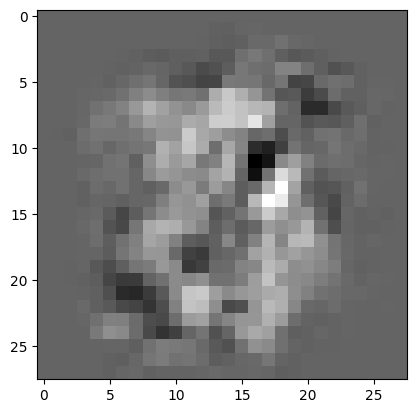

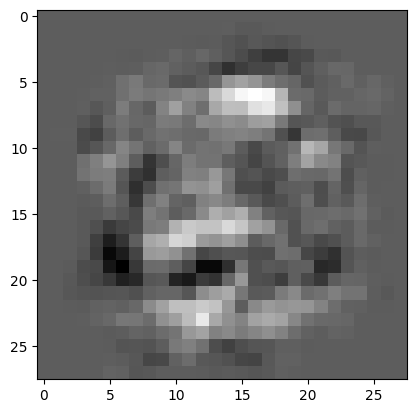

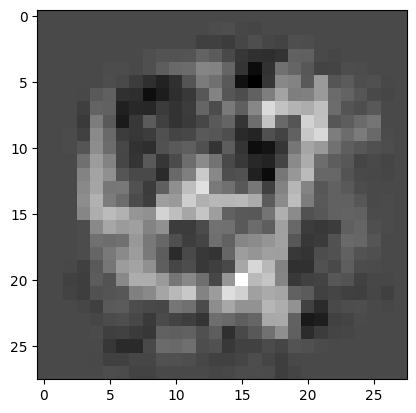

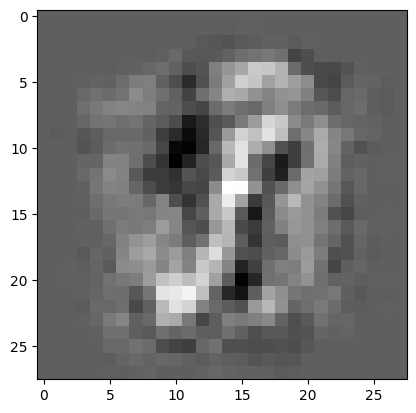

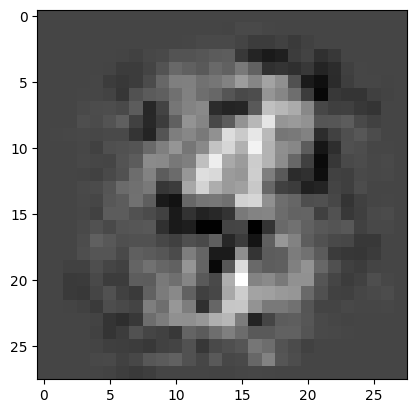

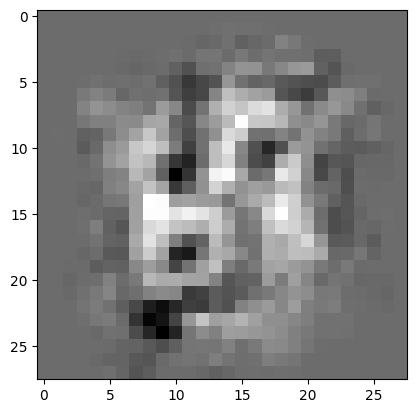

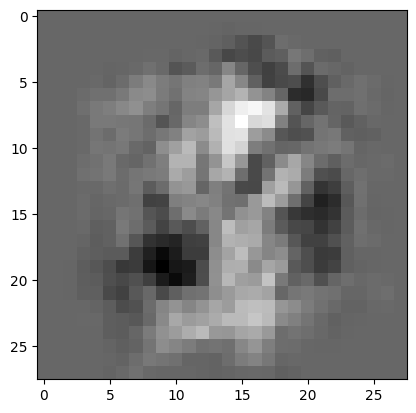

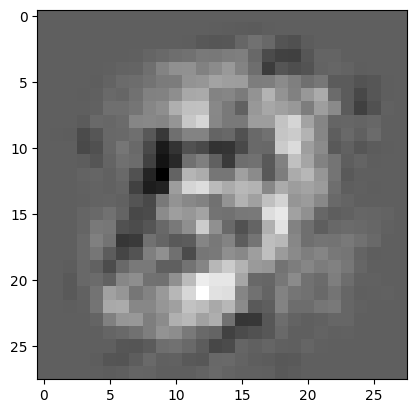

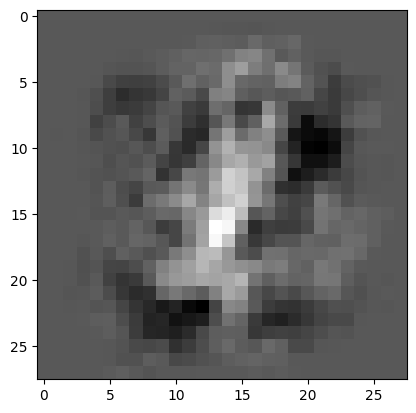

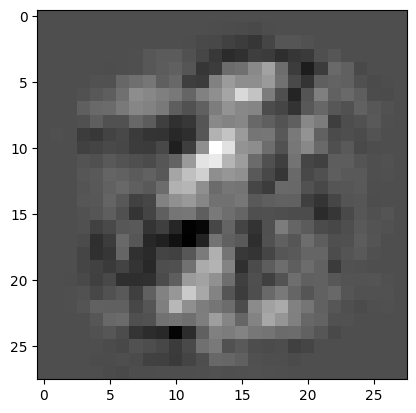

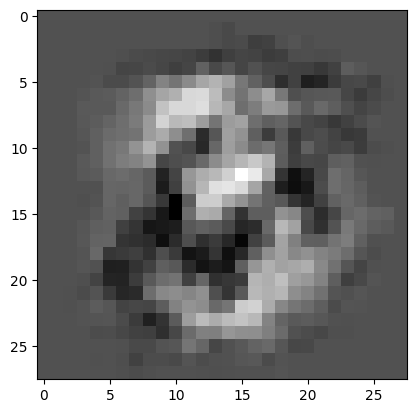

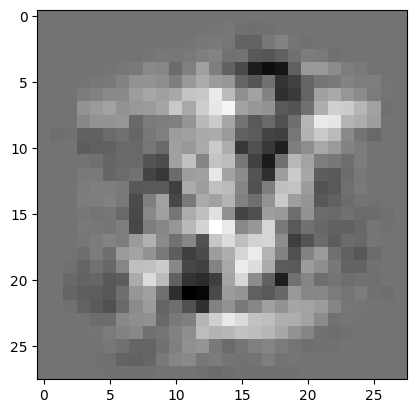

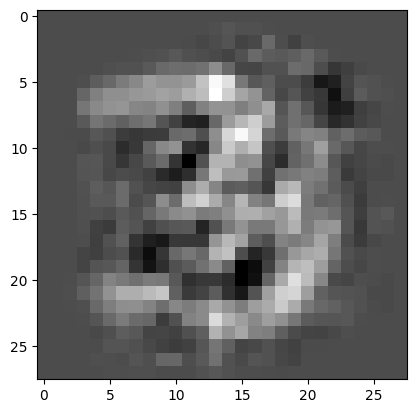

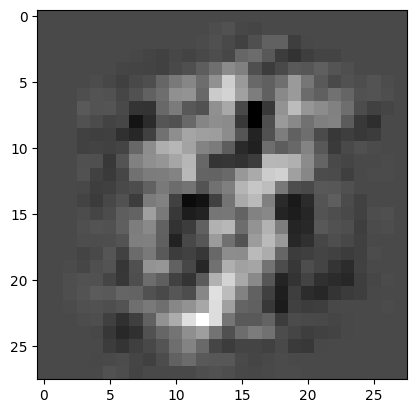

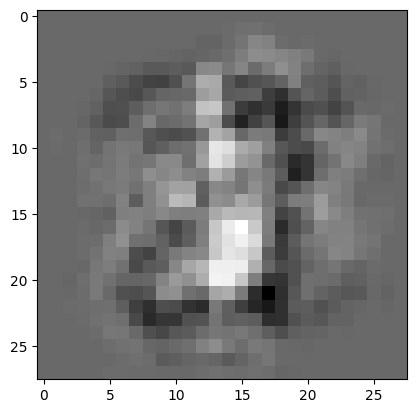

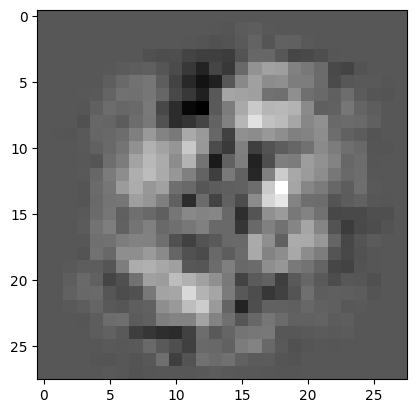

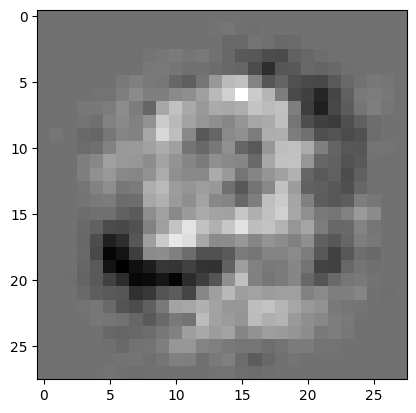

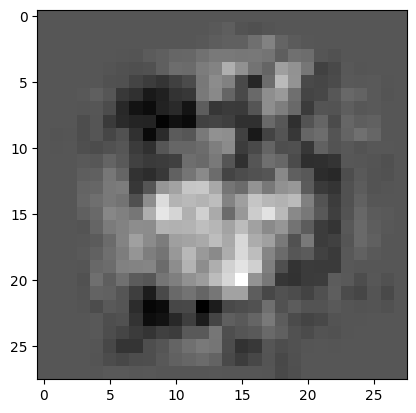

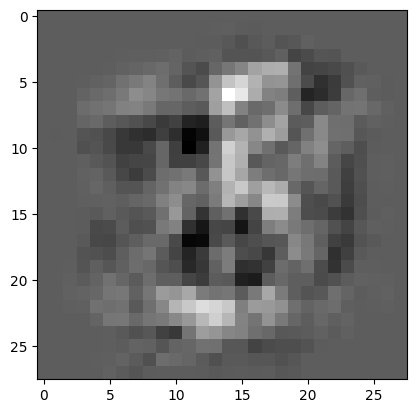

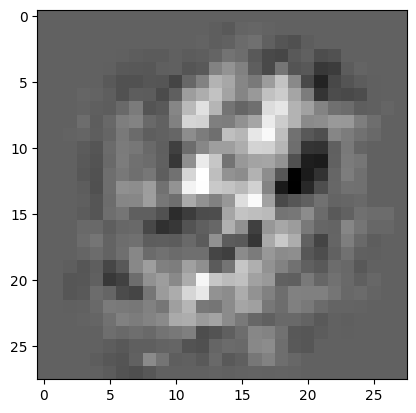

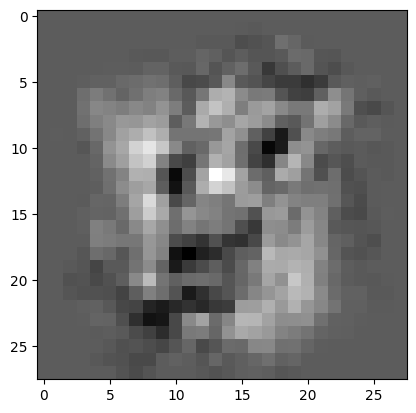

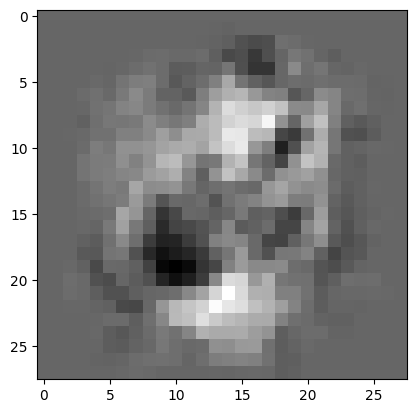

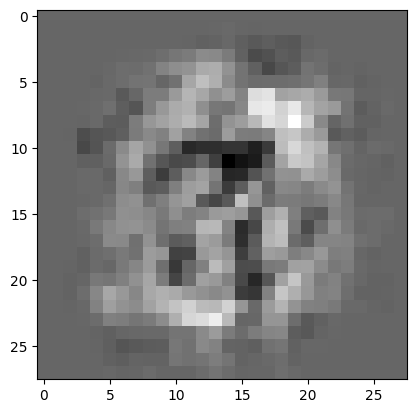

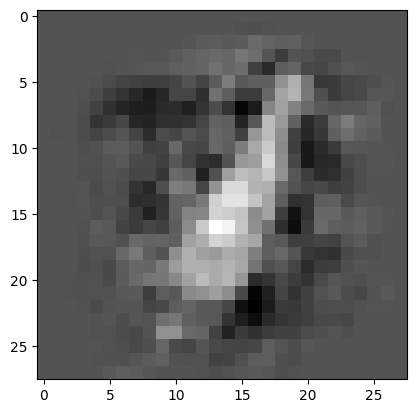

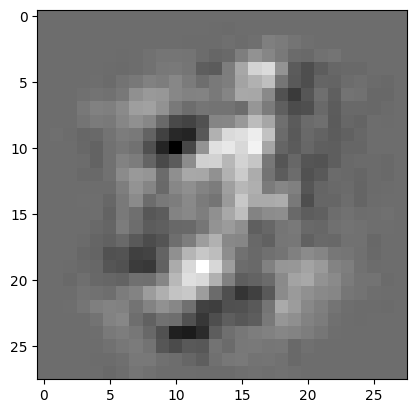

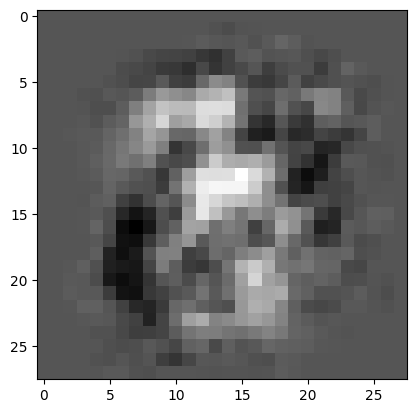

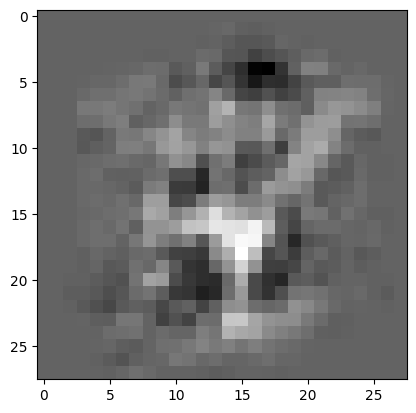

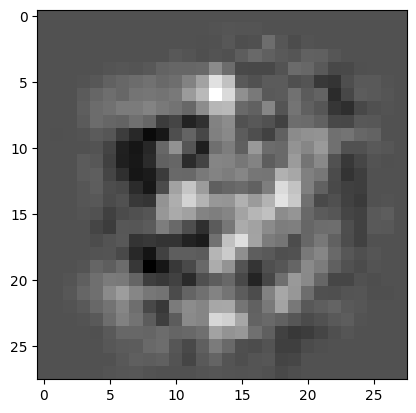

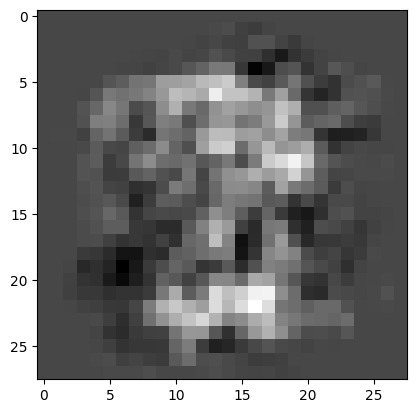

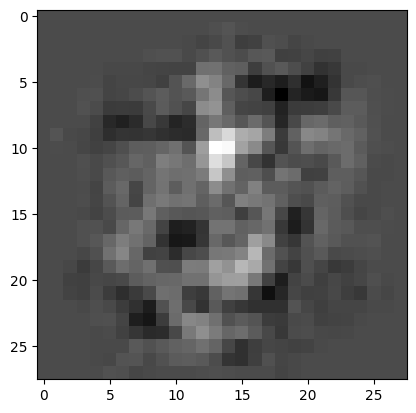

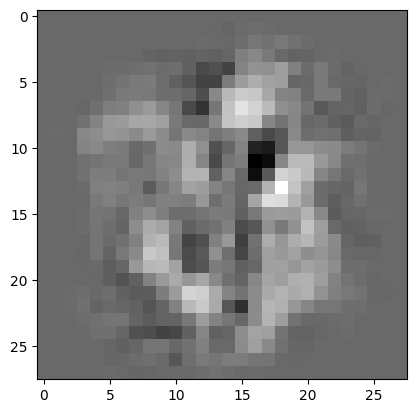

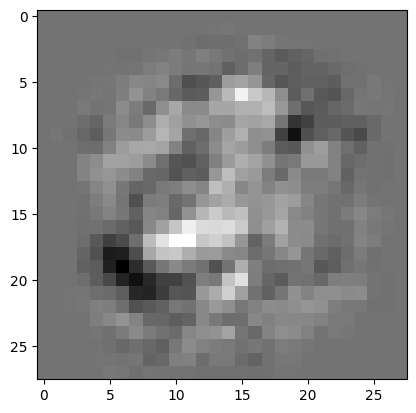

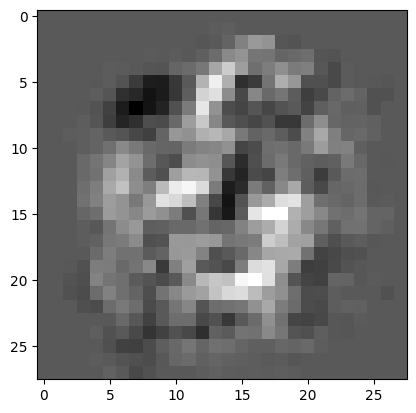

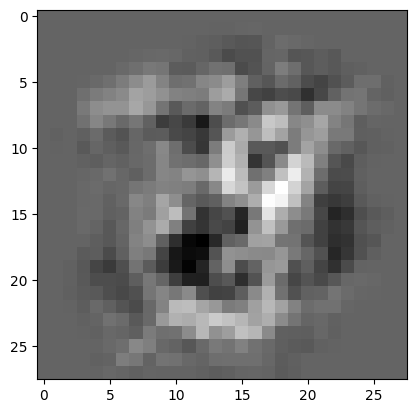

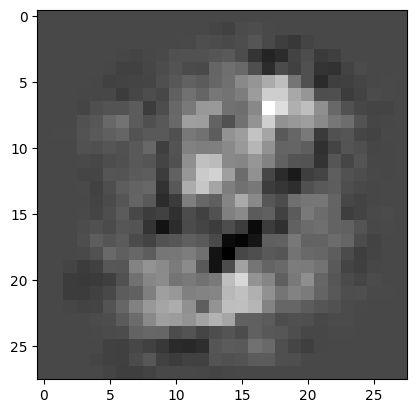

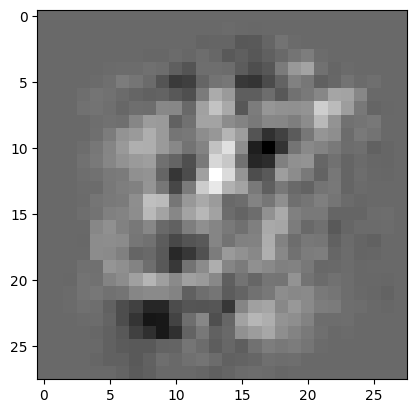

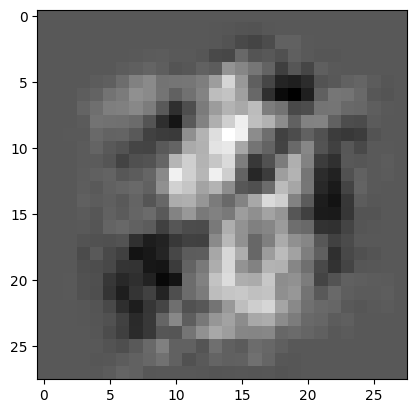

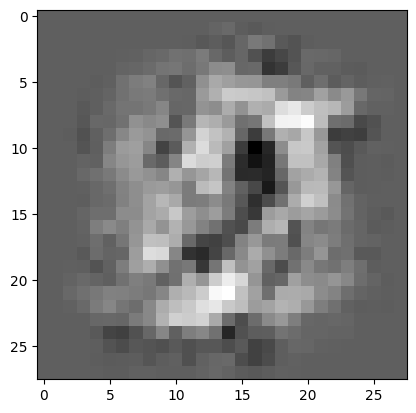

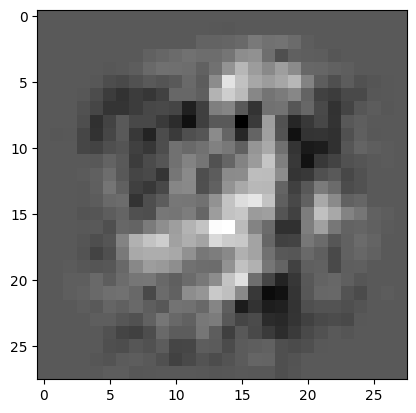

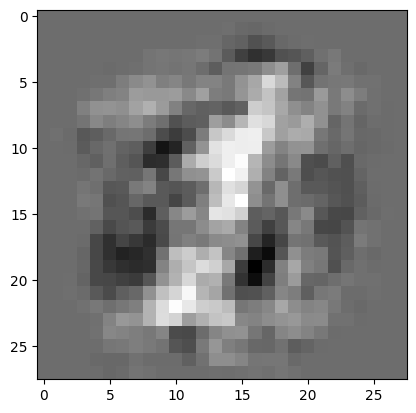

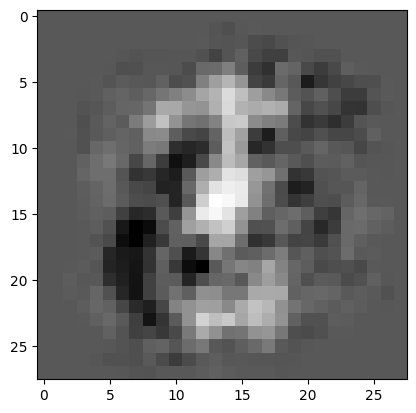

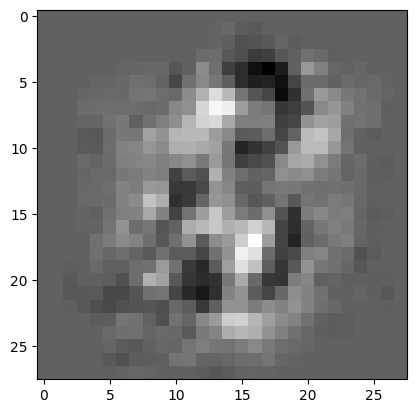

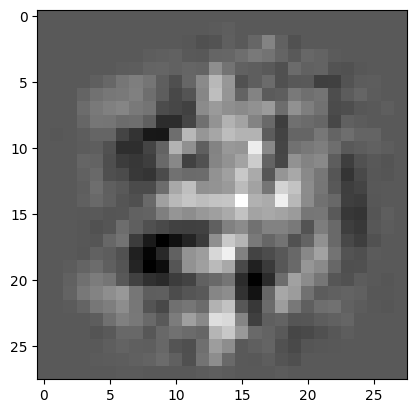

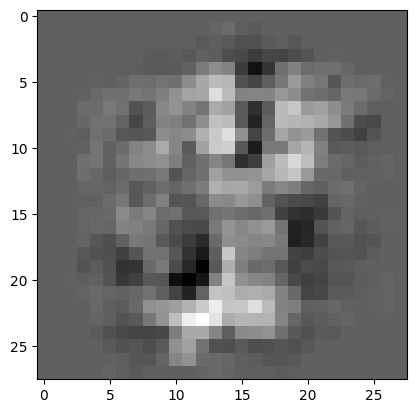

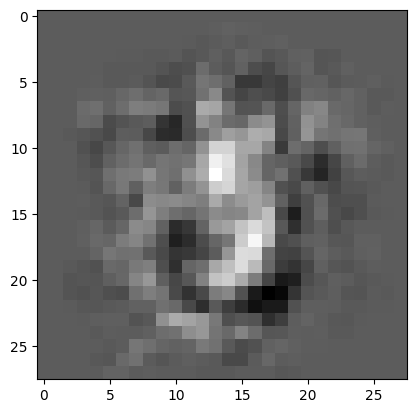

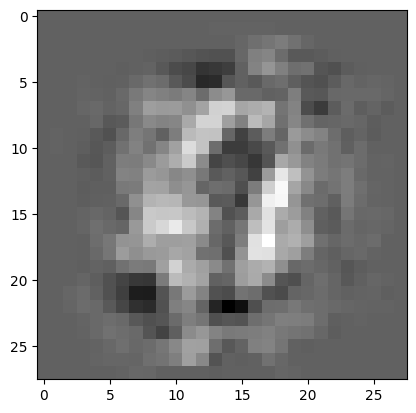

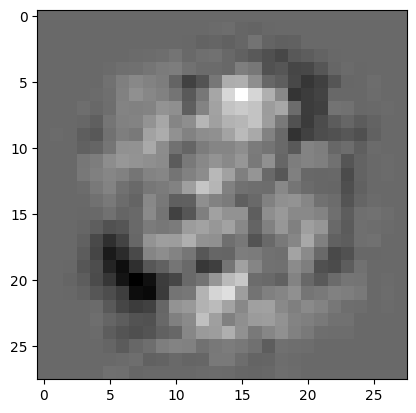

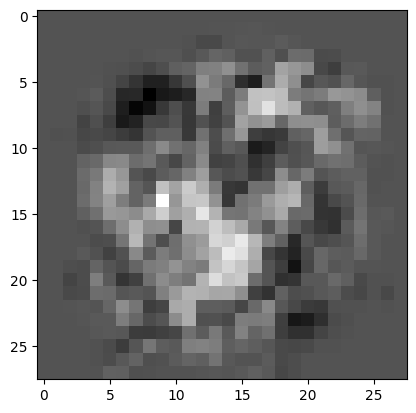

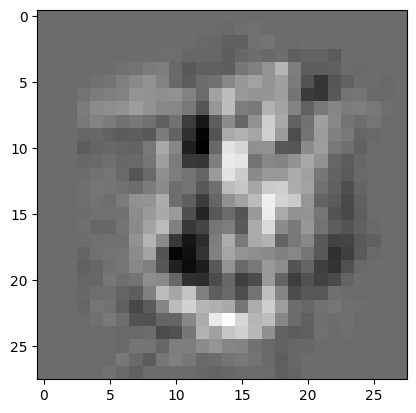

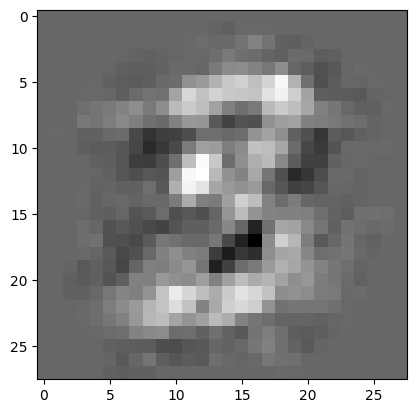

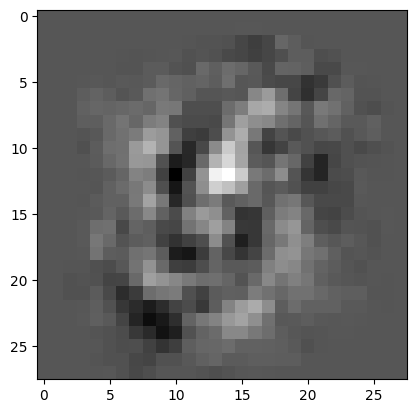

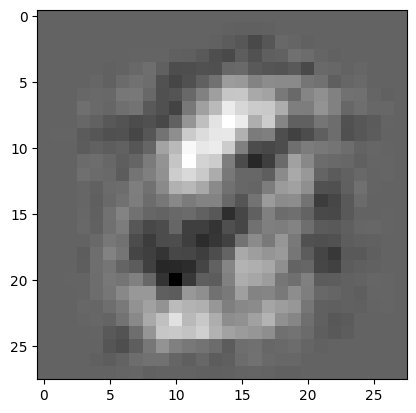

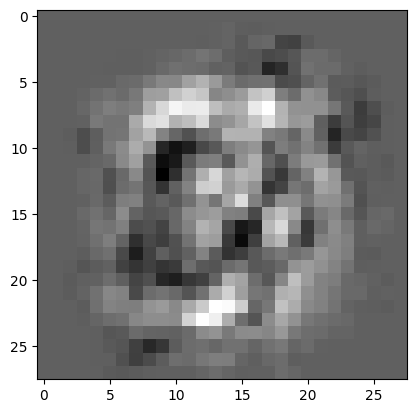

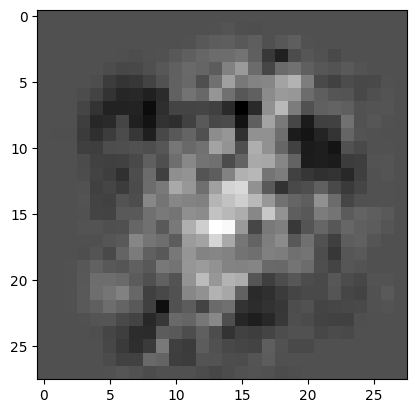

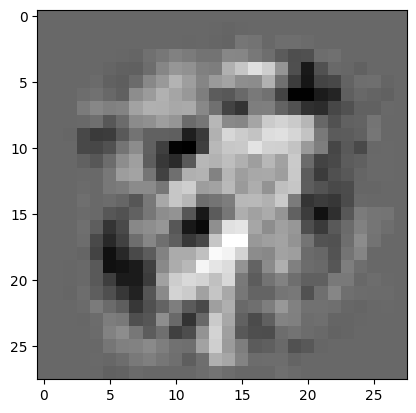

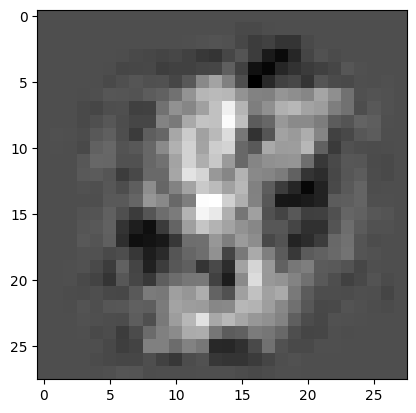

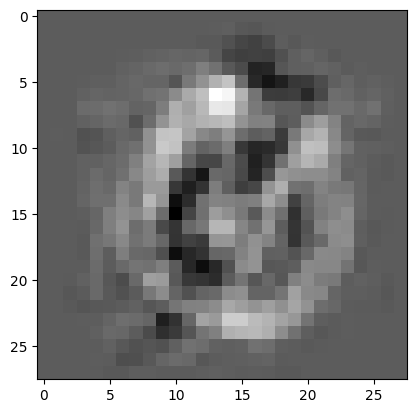

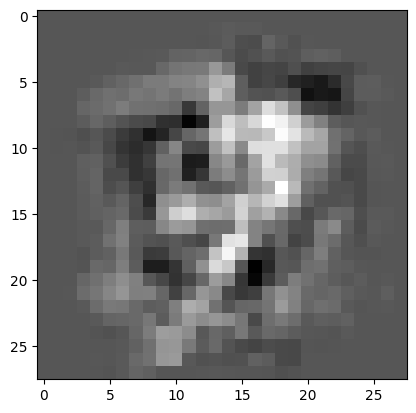

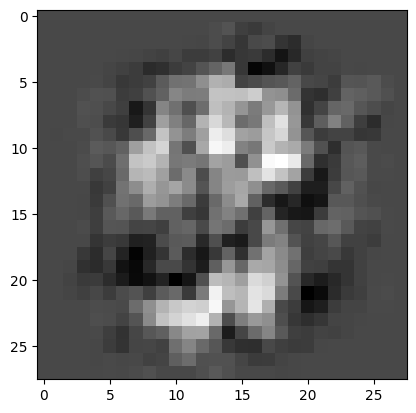

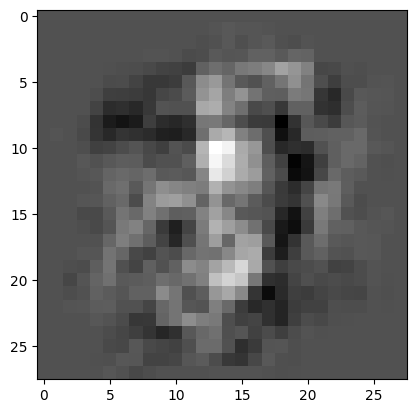

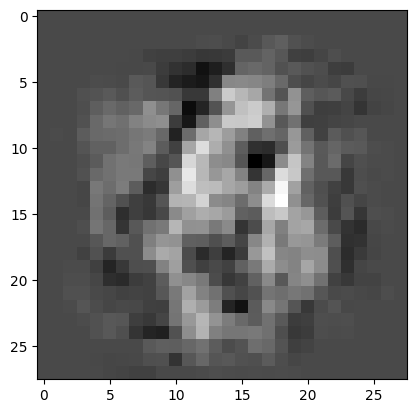

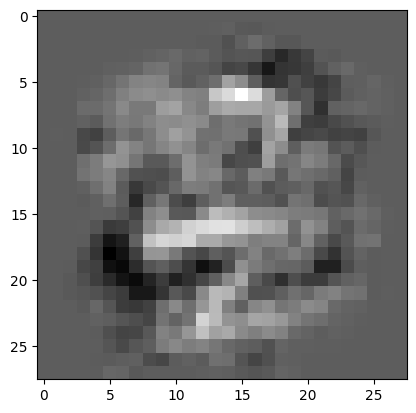

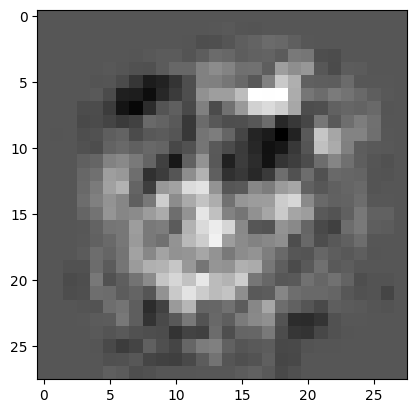

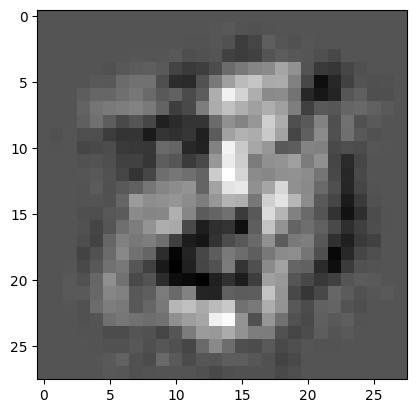

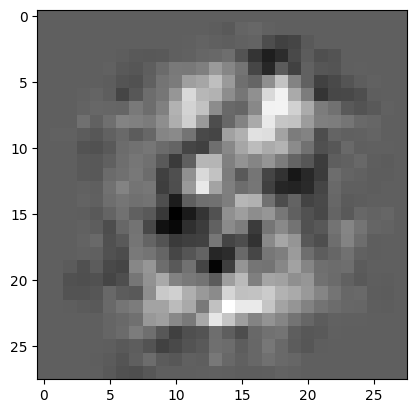

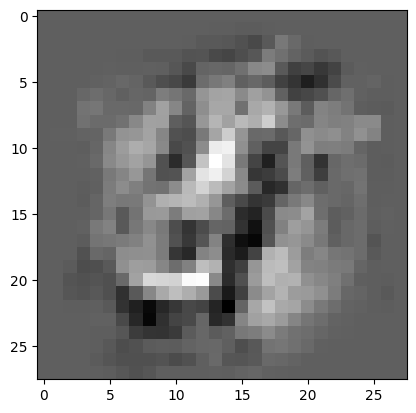

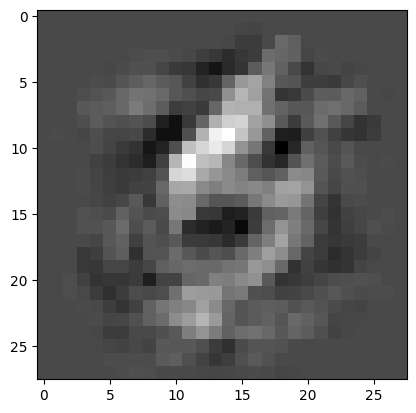

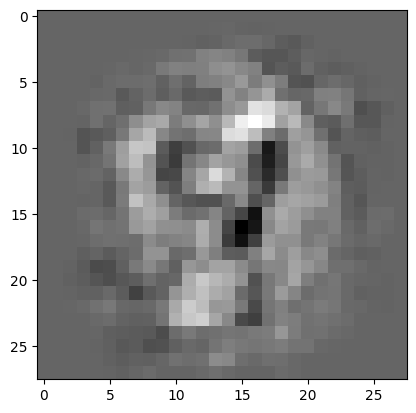

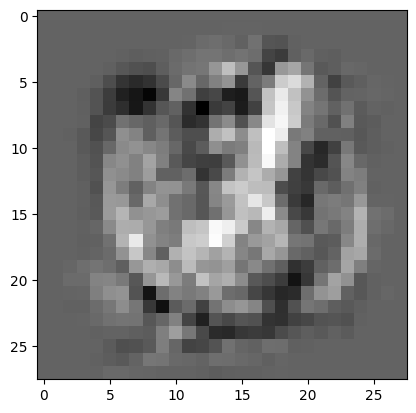

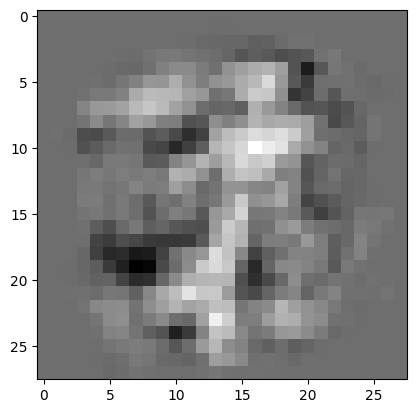

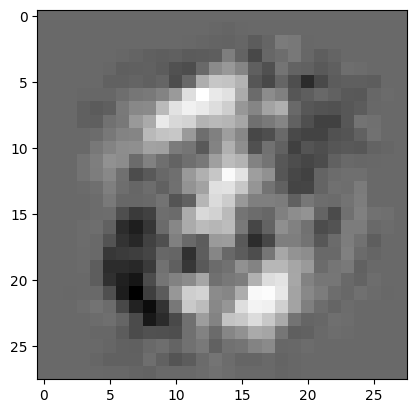

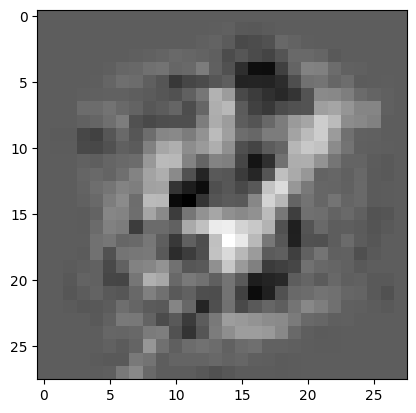

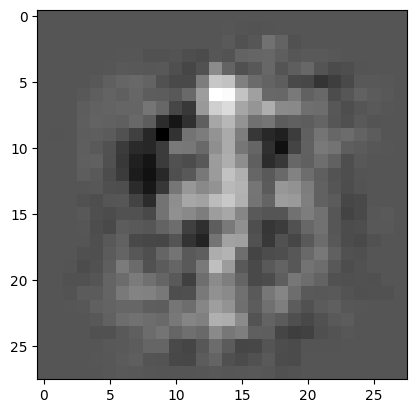

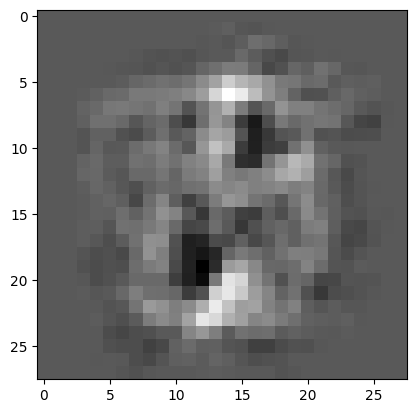

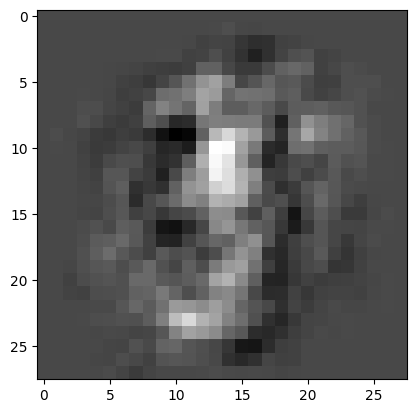

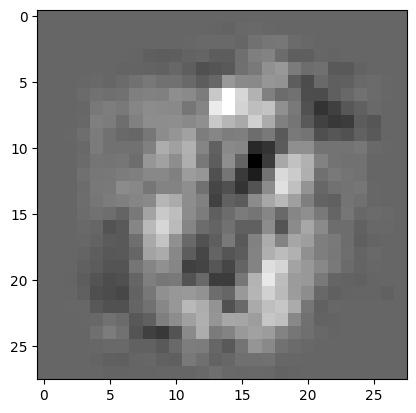

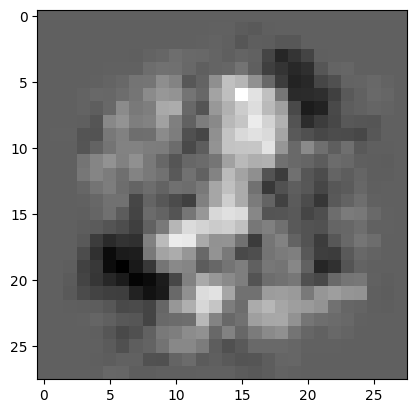

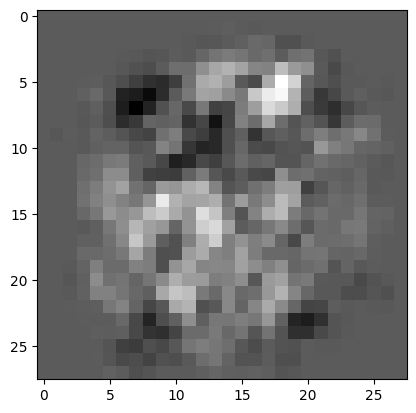

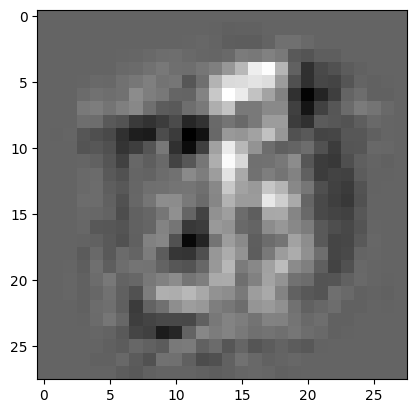

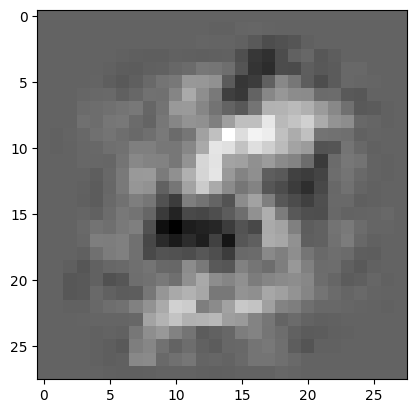

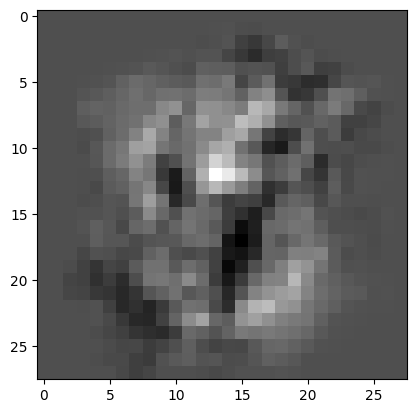

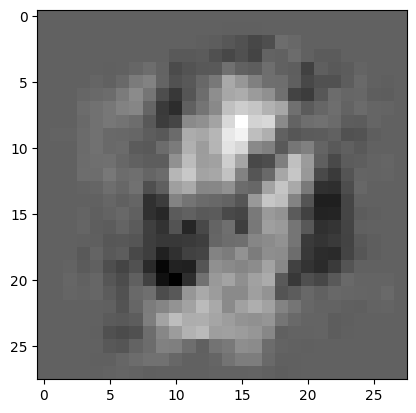

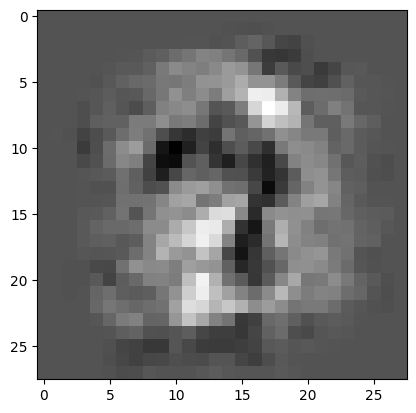

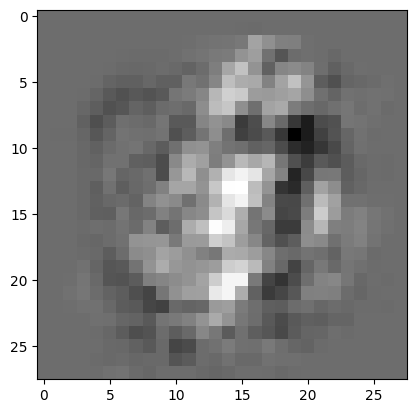

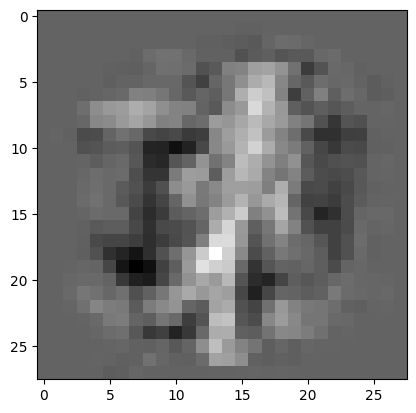

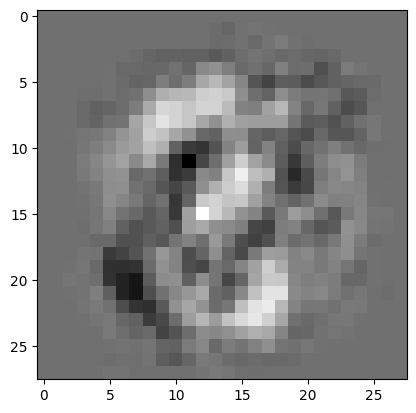

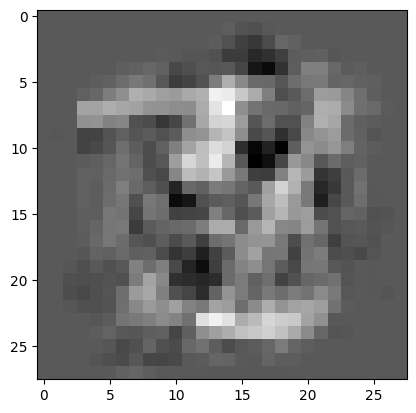

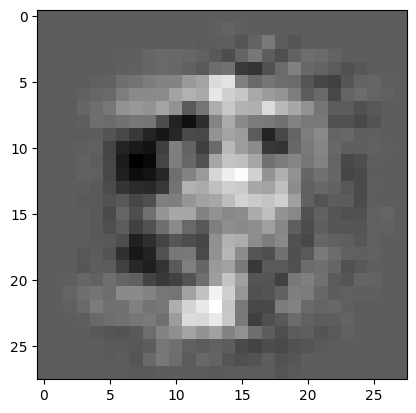

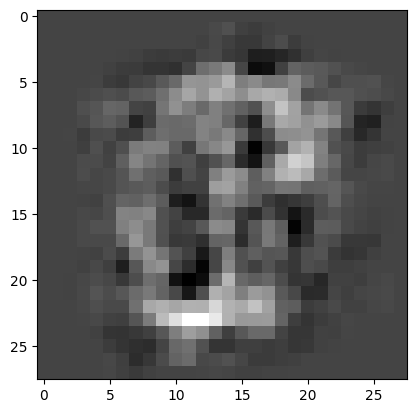

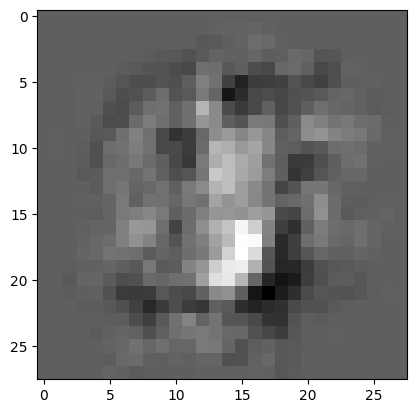

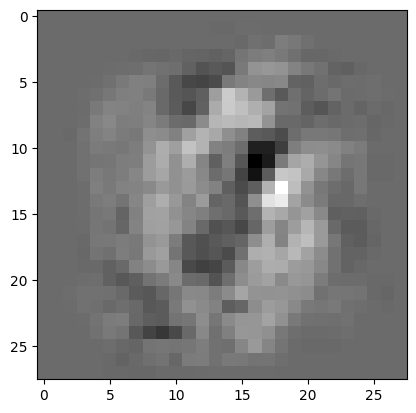

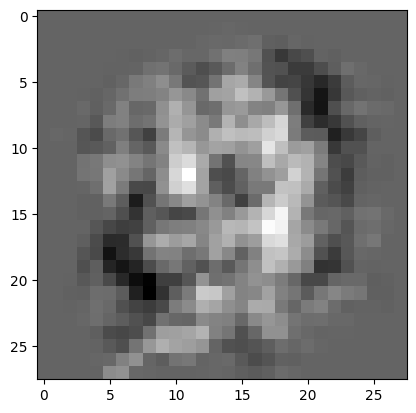

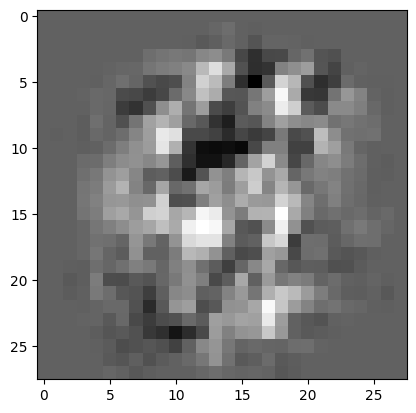

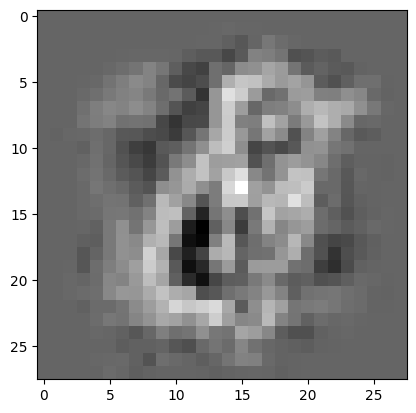

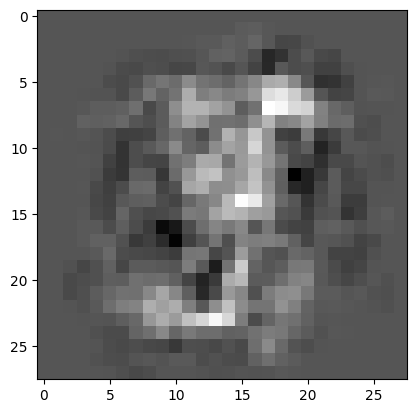

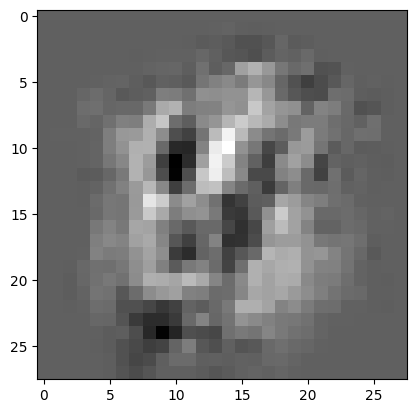

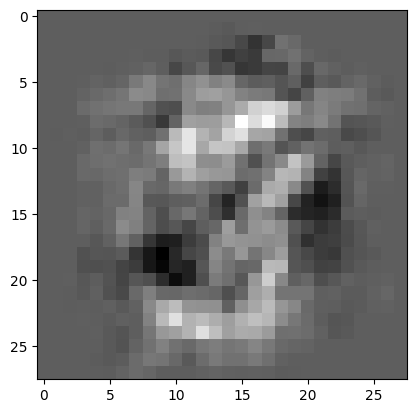

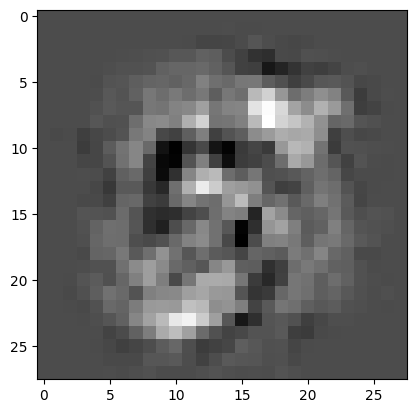

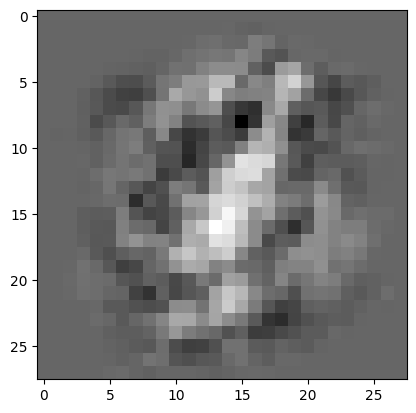

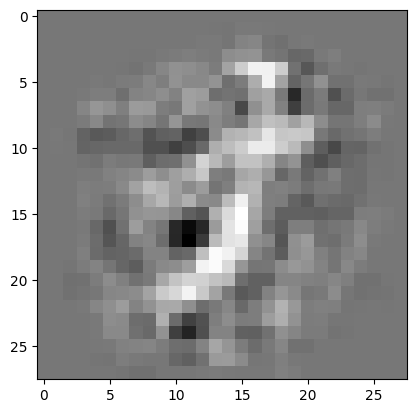

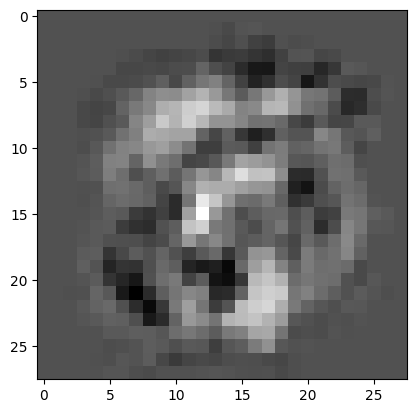

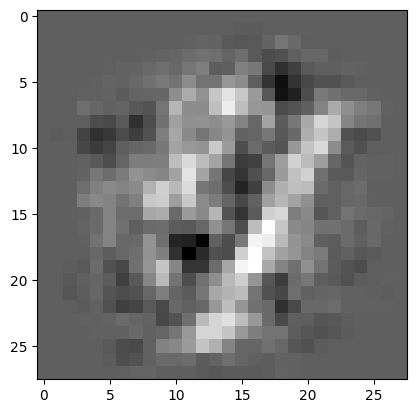

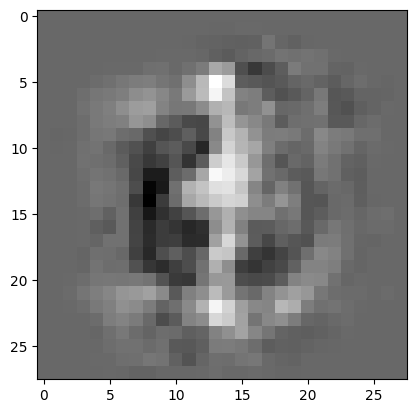

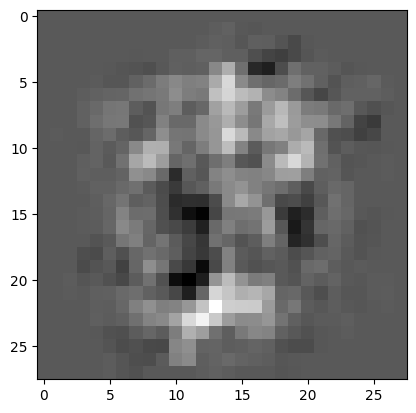

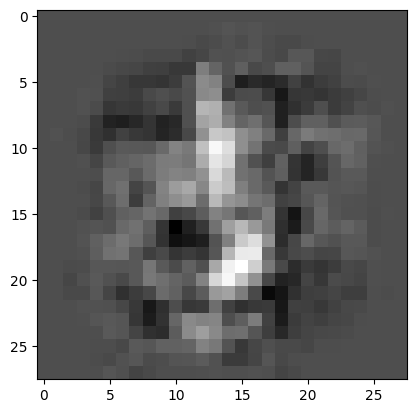

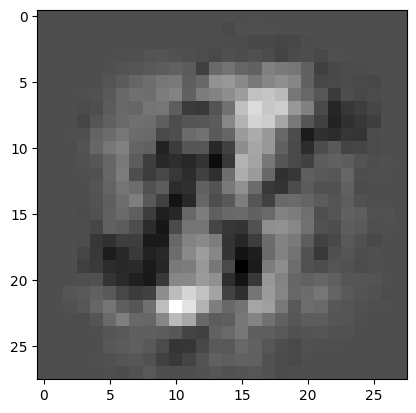

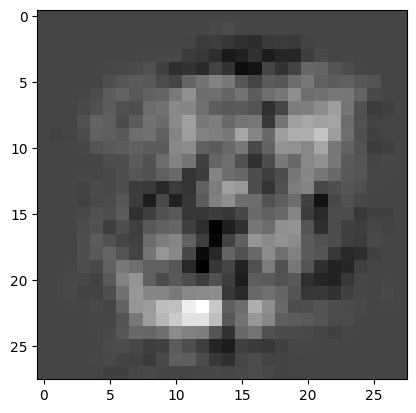

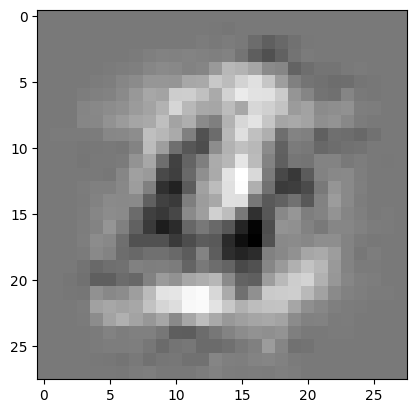

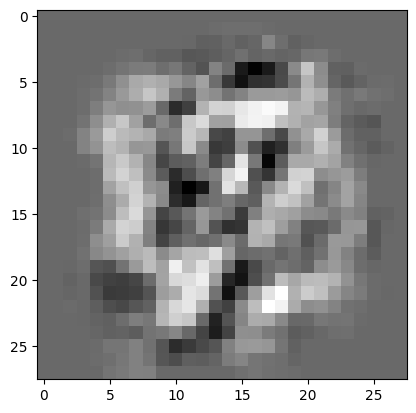

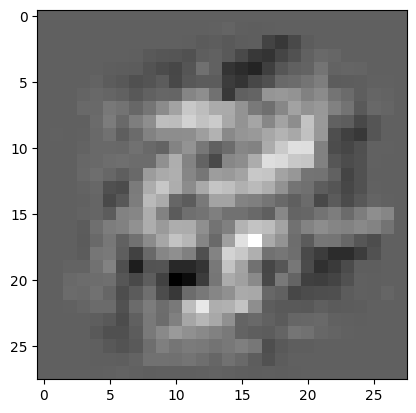

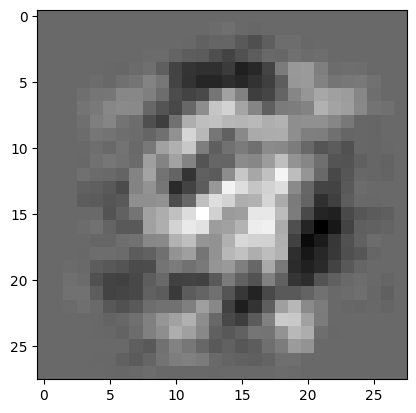

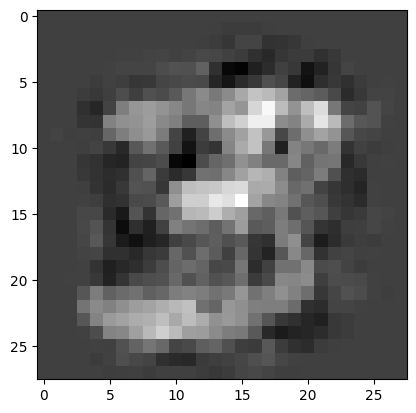

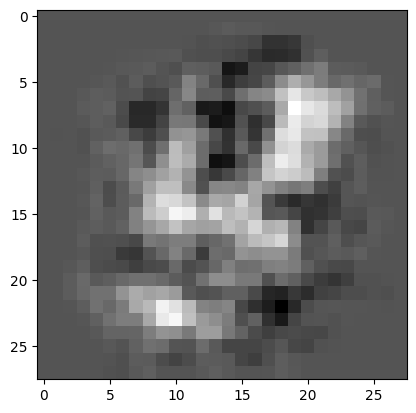

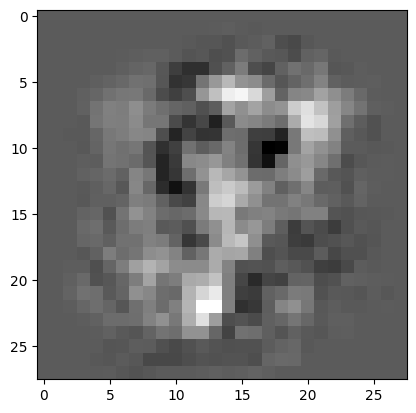

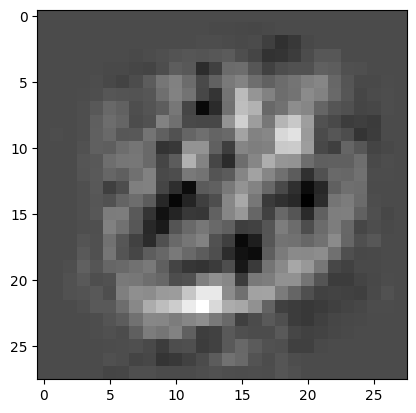

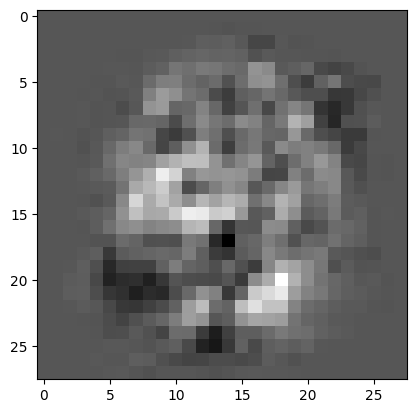

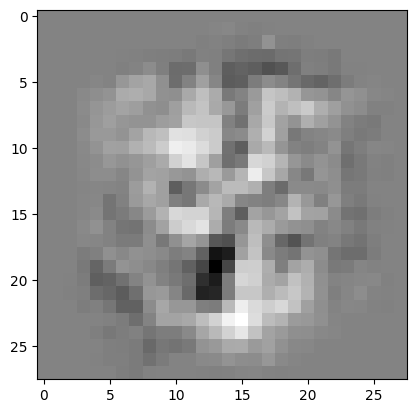

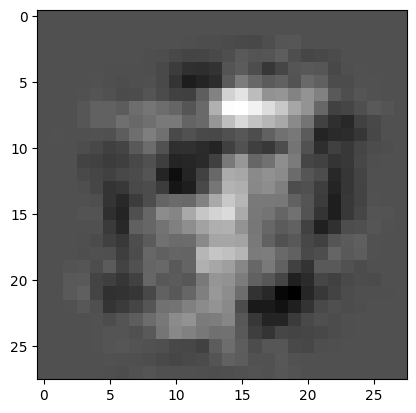

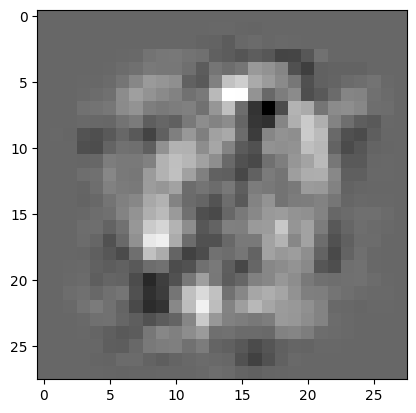

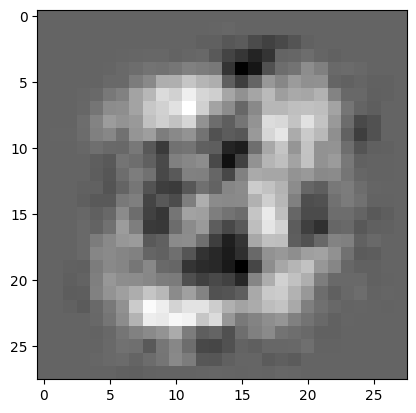

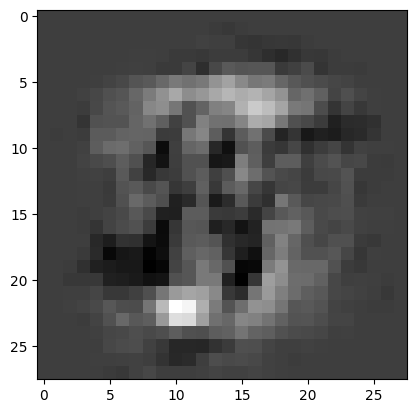

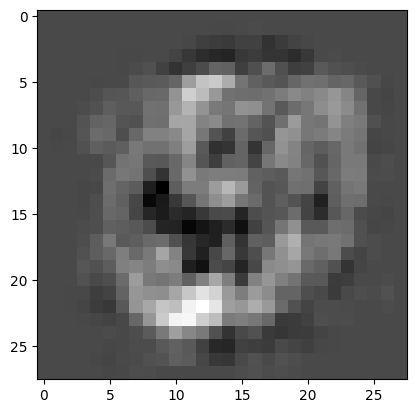

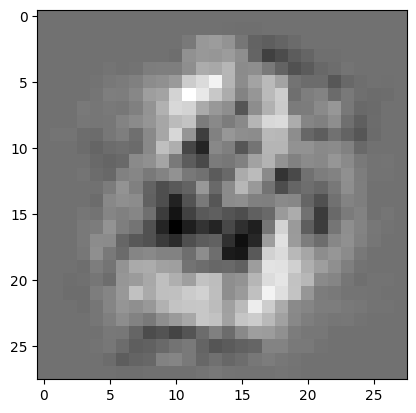

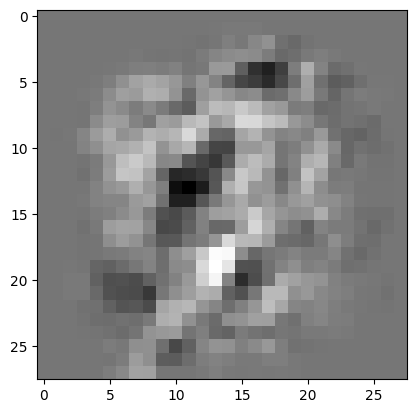

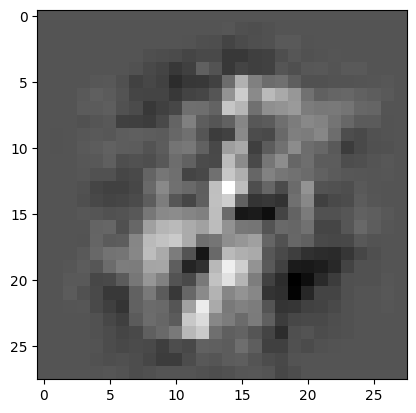

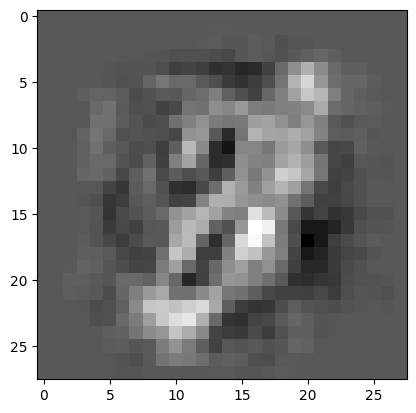

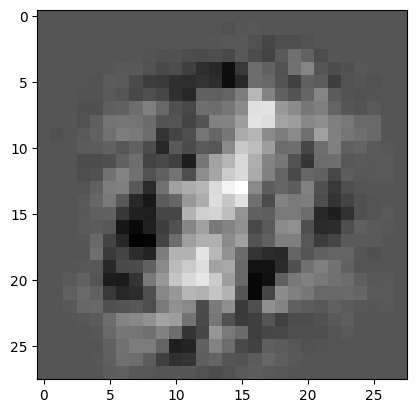

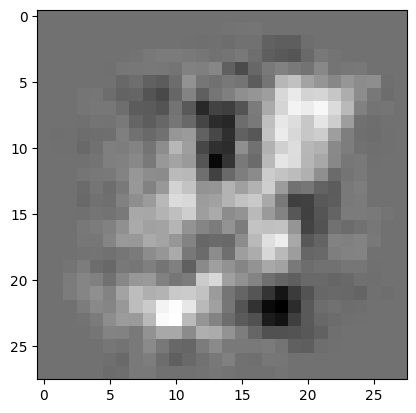

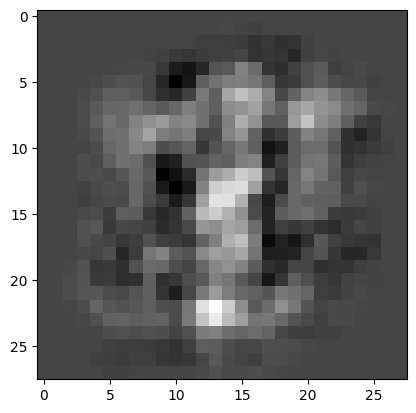

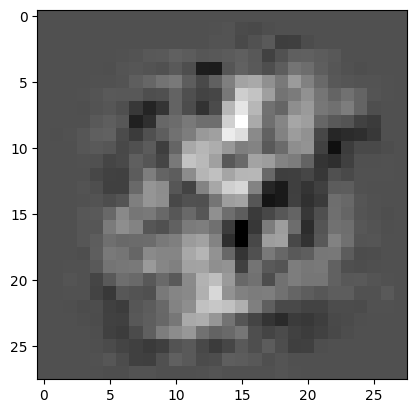

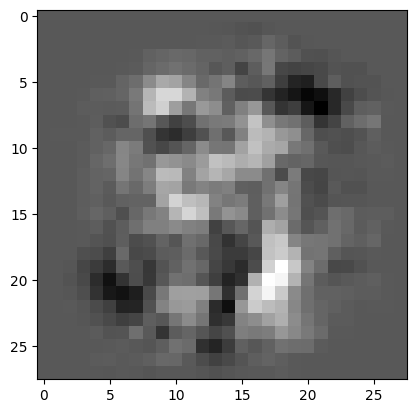

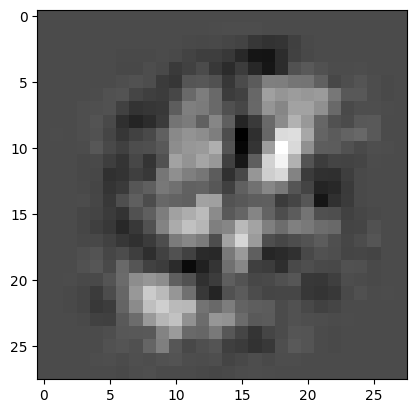

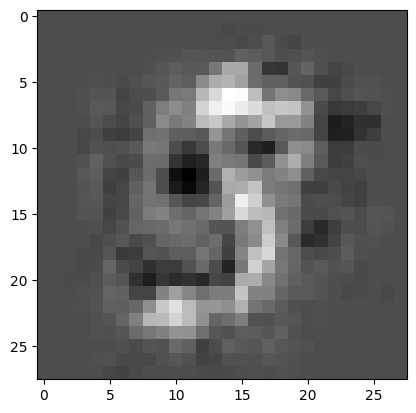

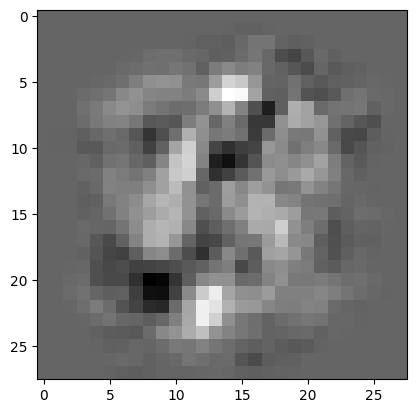

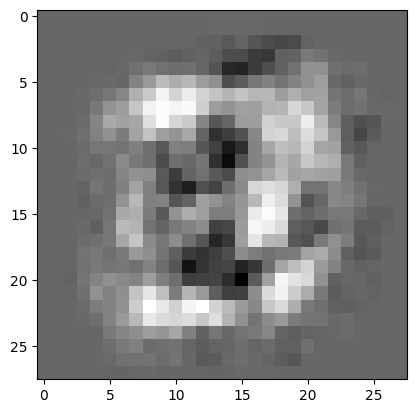

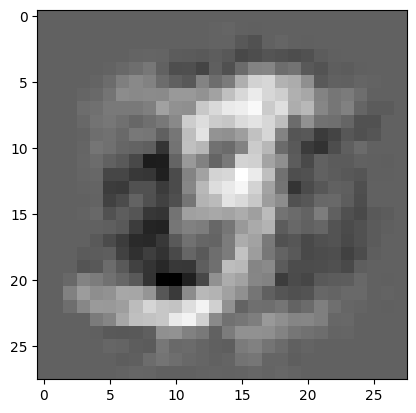

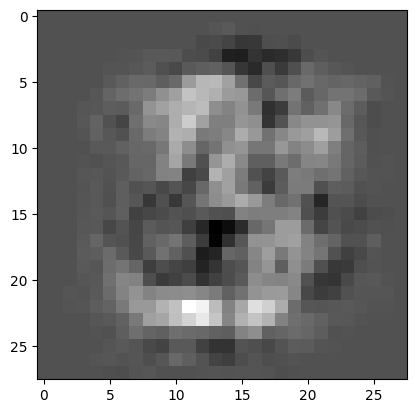

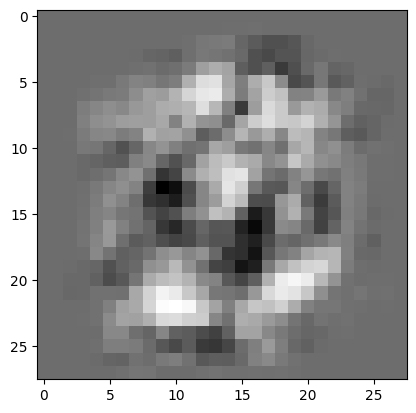

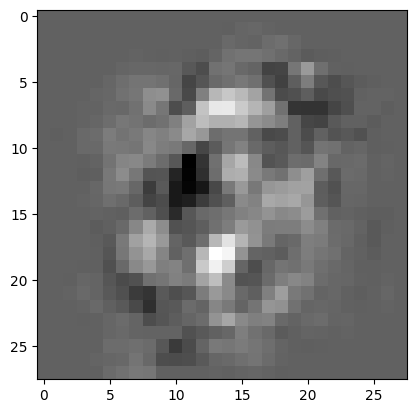

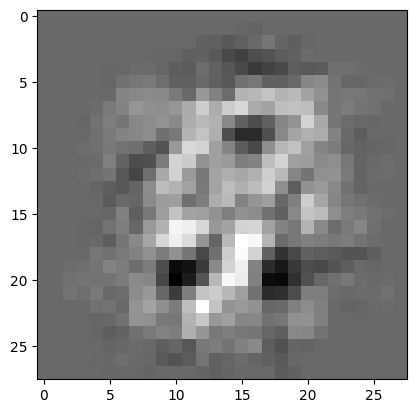

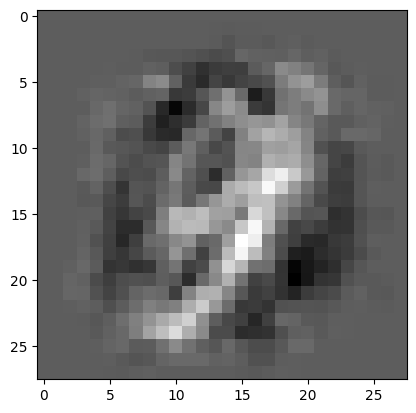

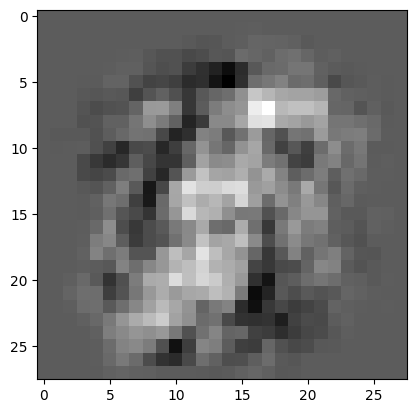

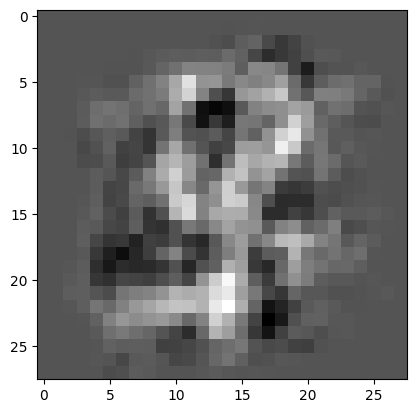

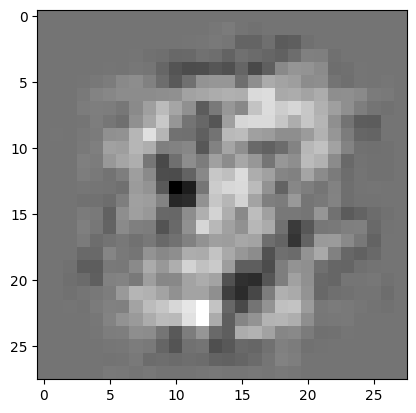

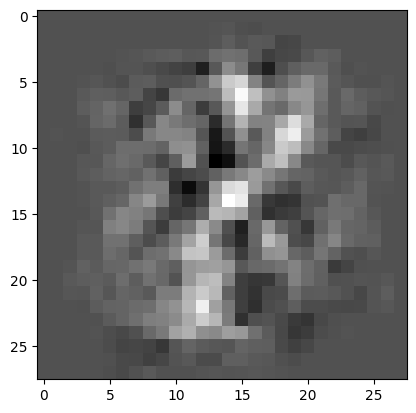

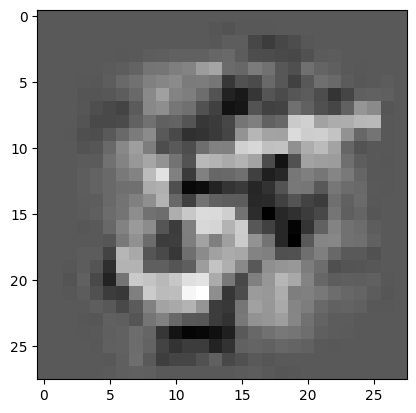

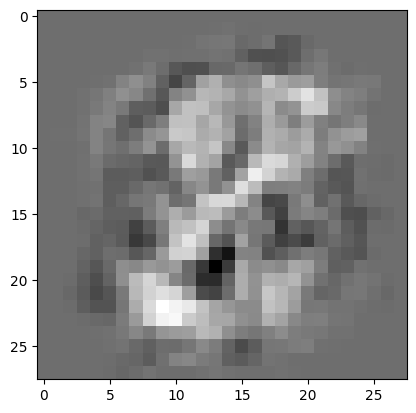

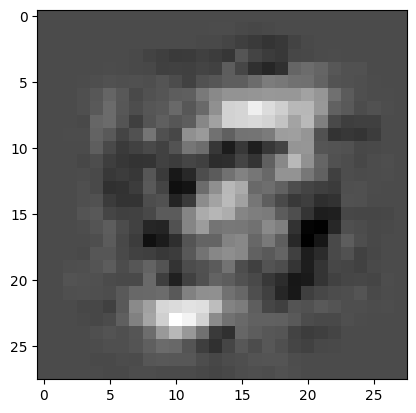

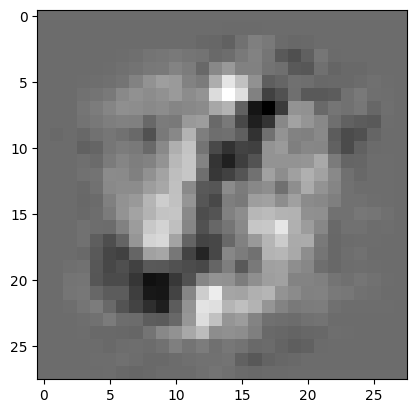

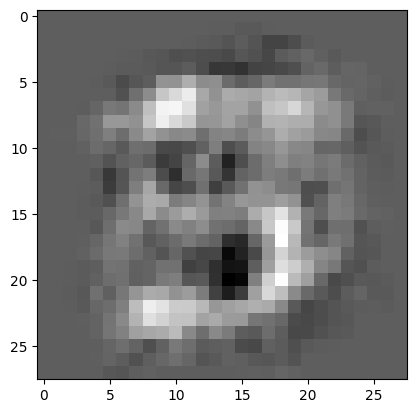

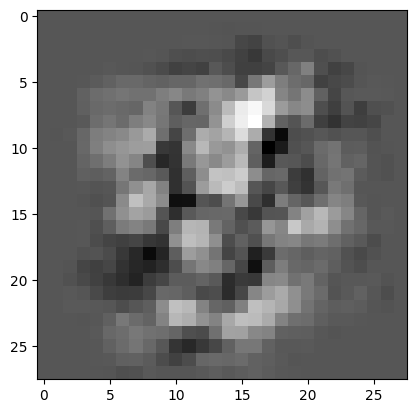

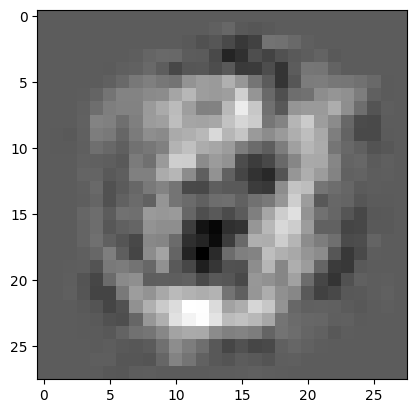

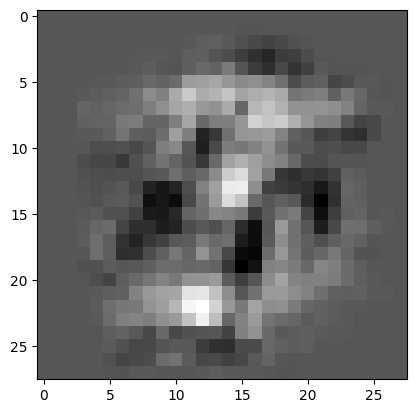

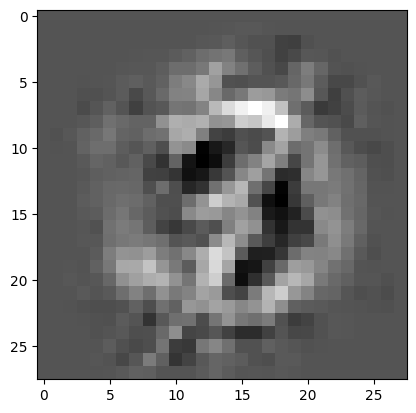

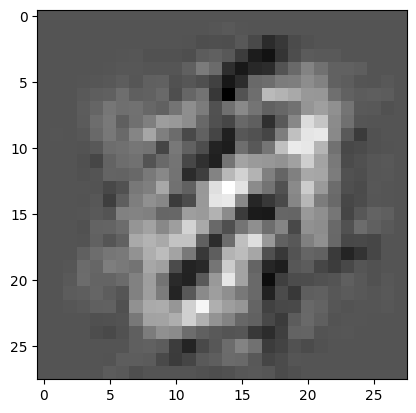

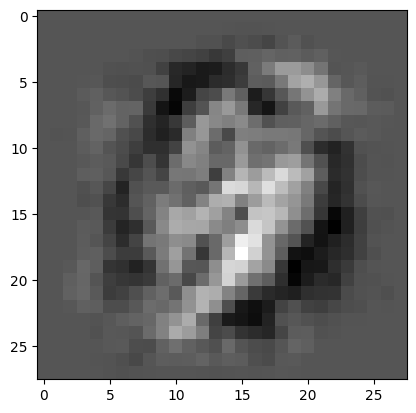

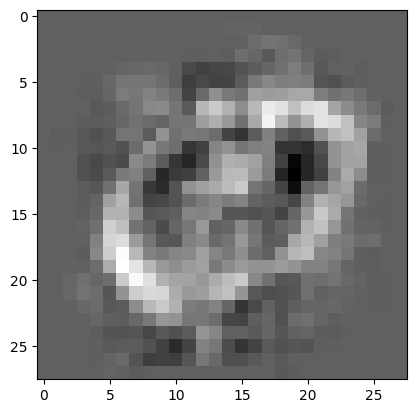

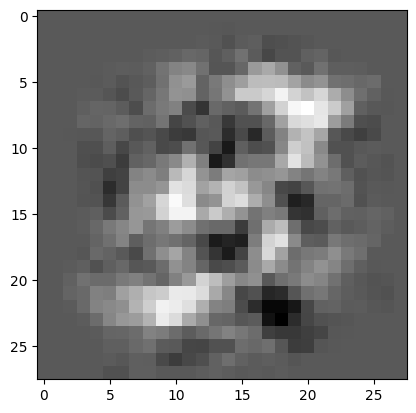

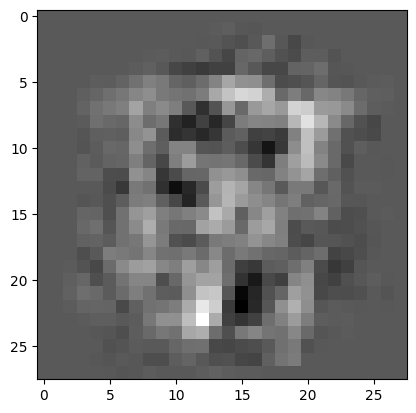

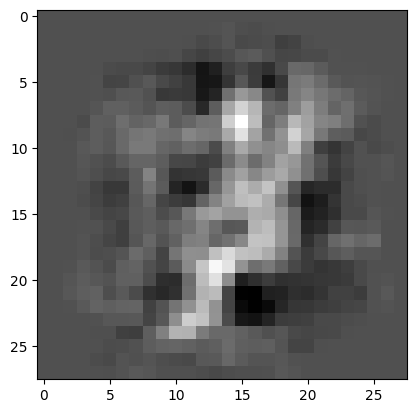

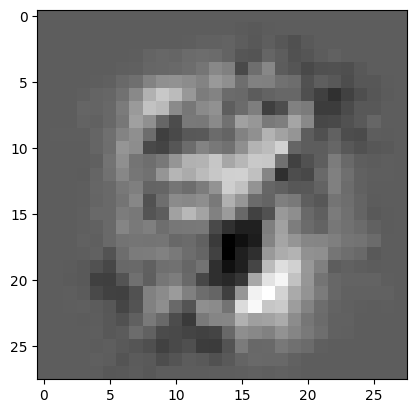

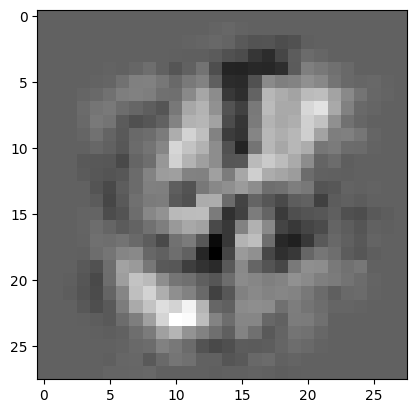

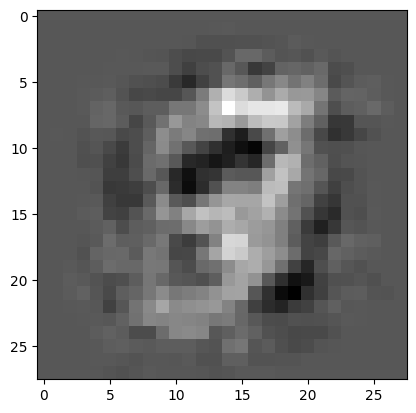

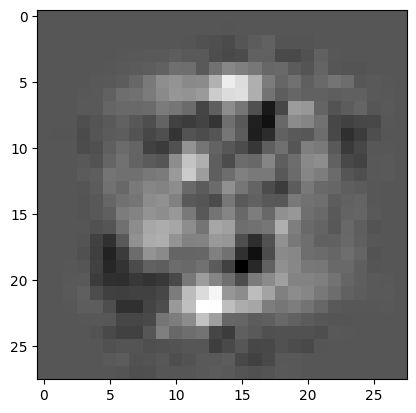

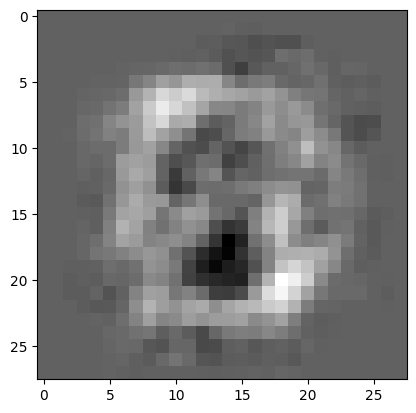

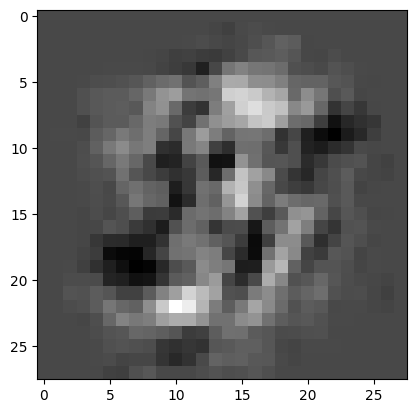

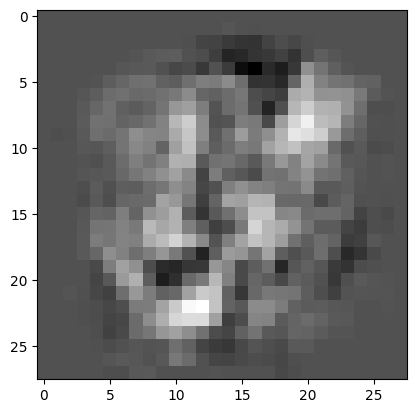

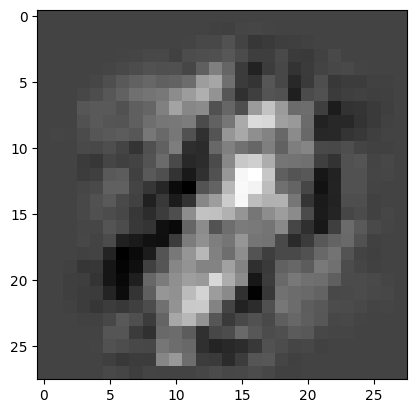

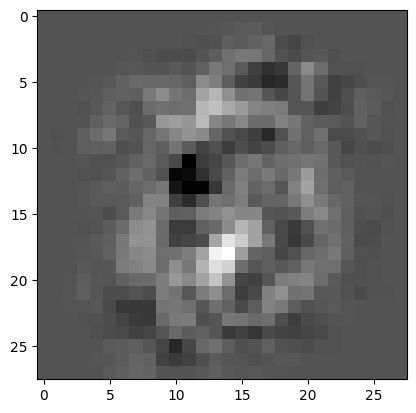

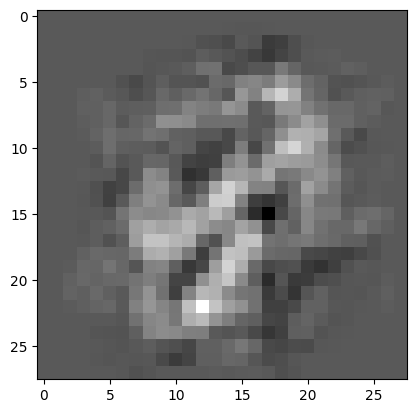

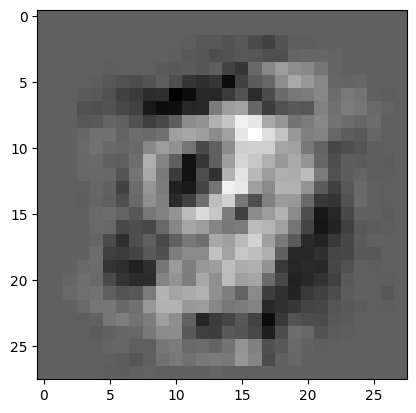

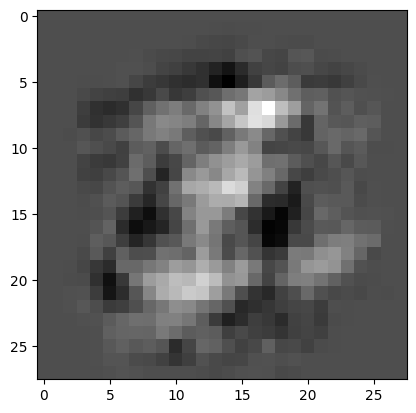

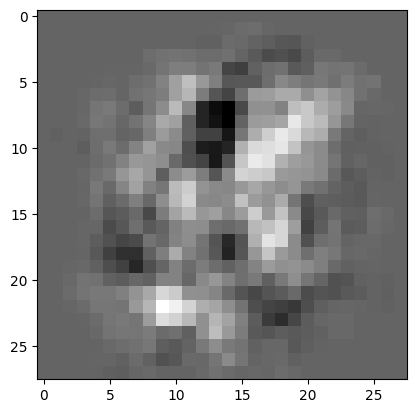

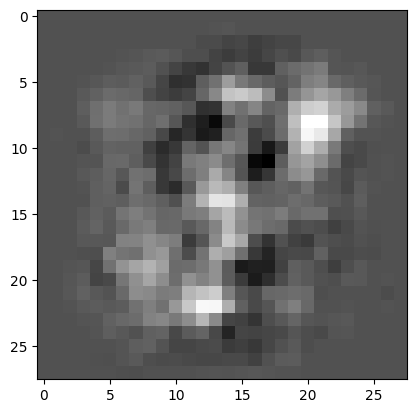

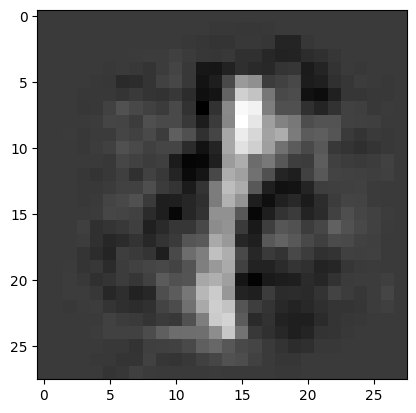

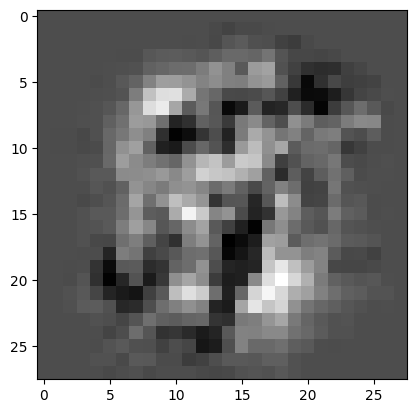

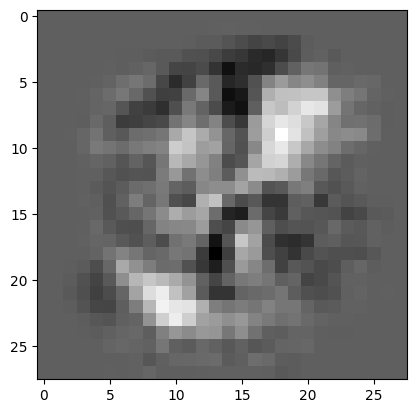

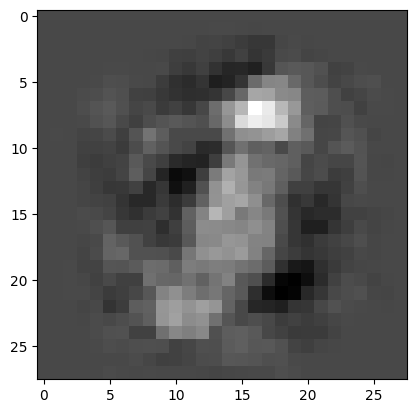

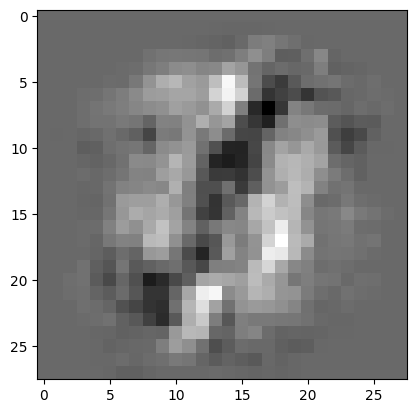

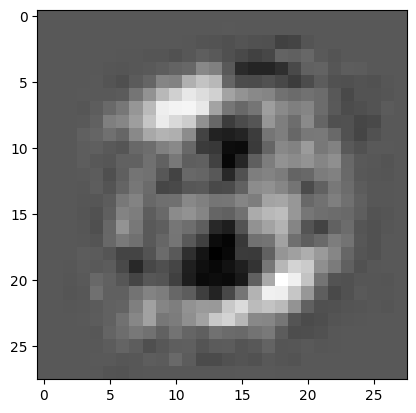

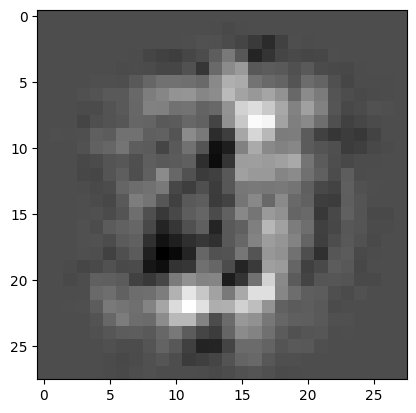

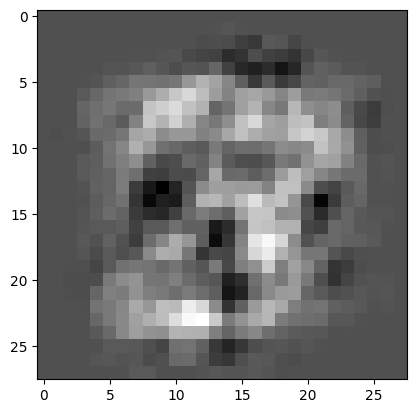

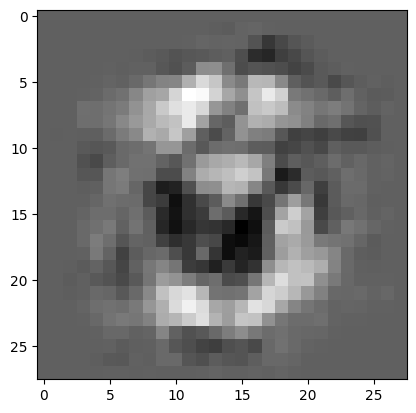

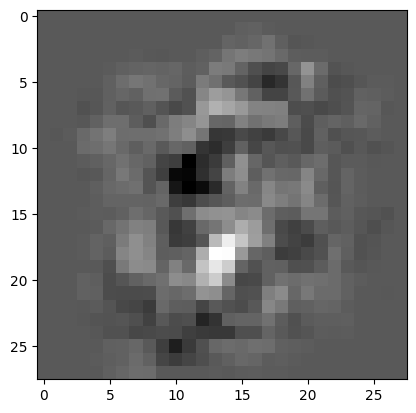

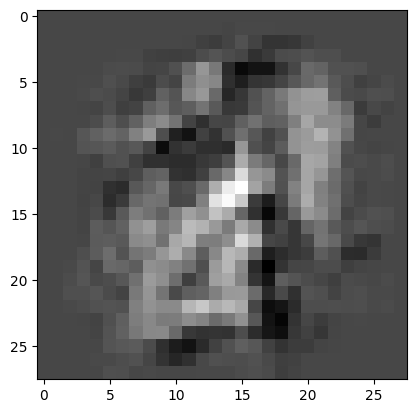

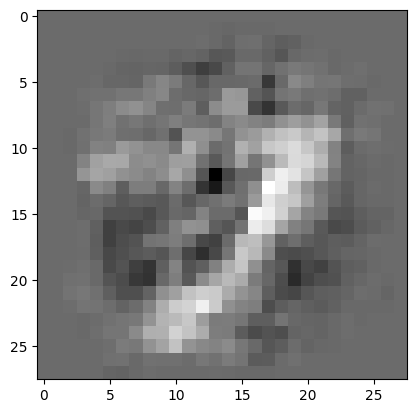

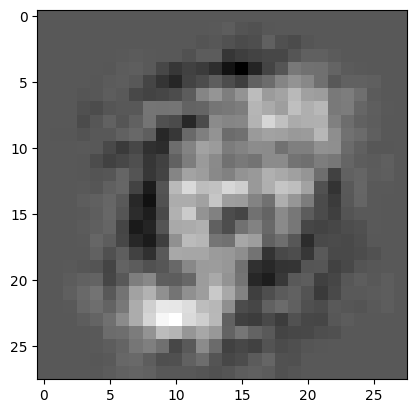

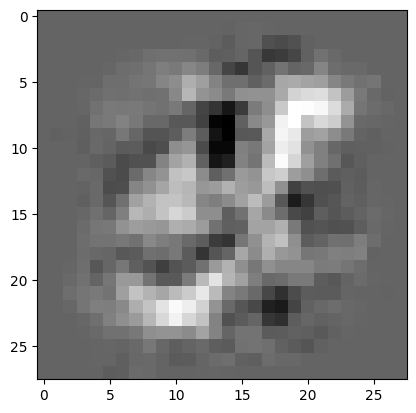

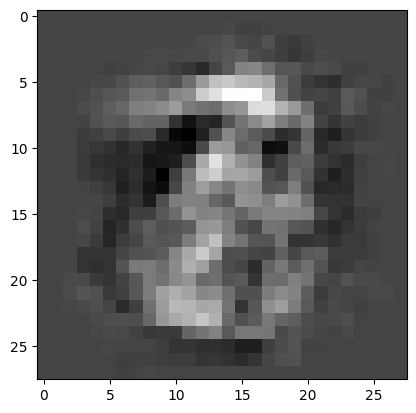

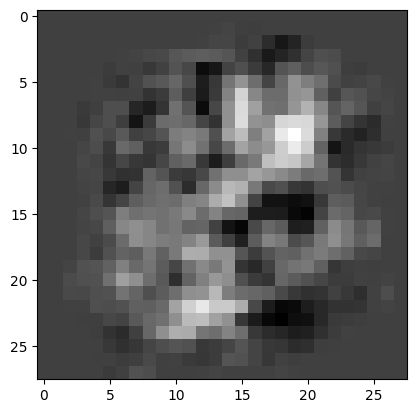

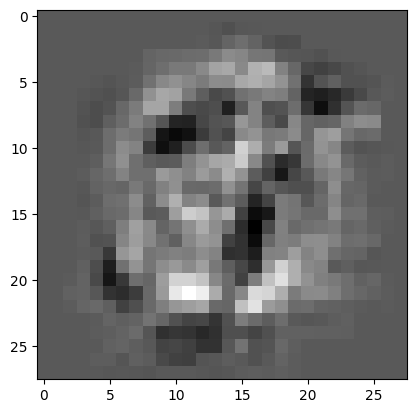

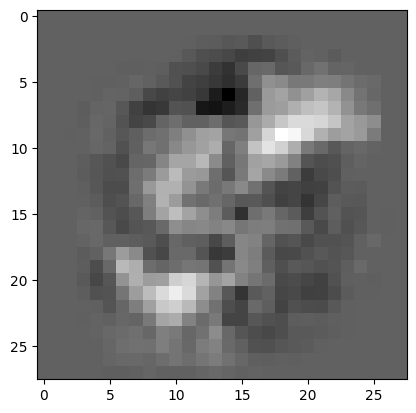

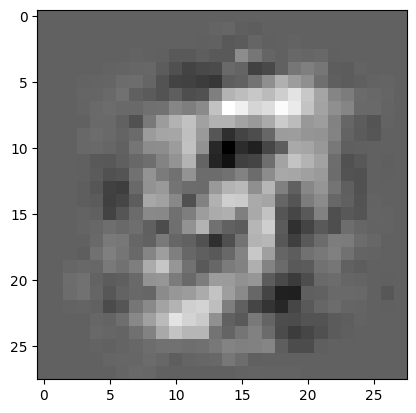

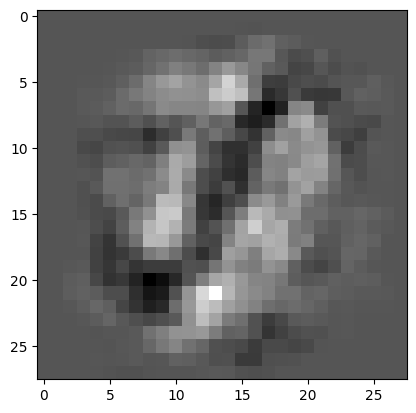

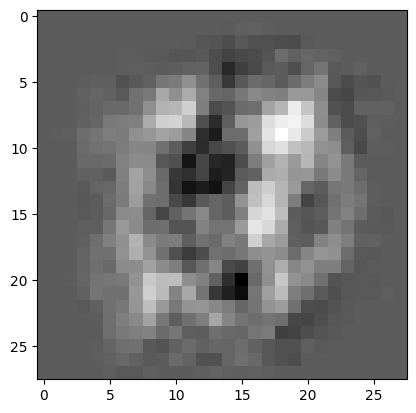

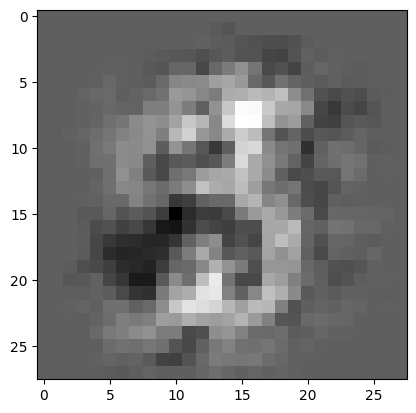

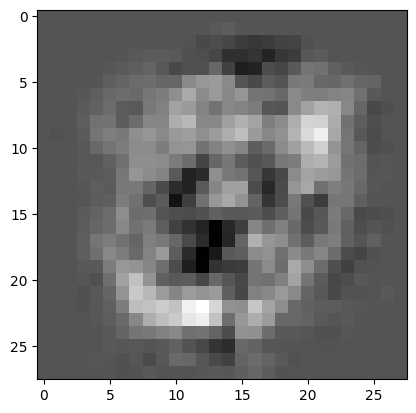

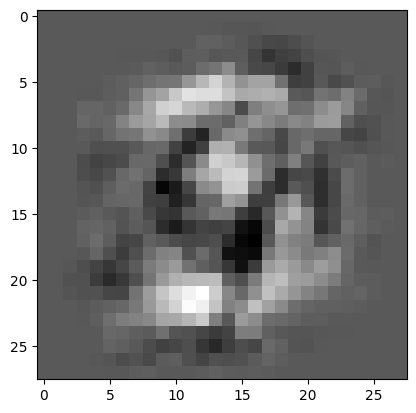

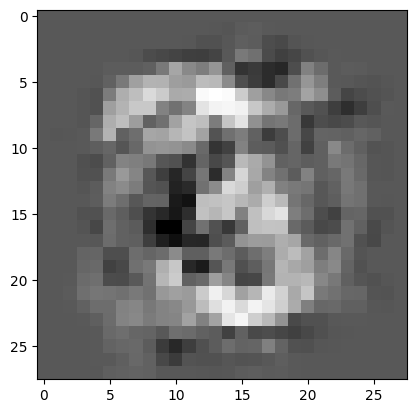

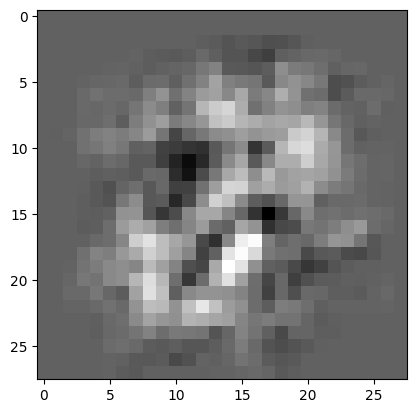

KeyboardInterrupt: 

In [2]:
mnist_data, noisy_mnist_data =prepare_data(mnist, num_imgs=num_imgs, preprocess_sensory=True, noise_level="none", across_dataset=False)

velocities = space_filling_curve([[3,3], [5,5], [7,7]])

vhash.learn_path(observations=mnist_data, velocities=velocities[:num_imgs])
recalled_imgs = vhash.recall(noisy_mnist_data)
recalled_imgs = recalled_imgs.reshape(-1, 1, 28, 28)

for i in range(num_imgs):
    recalled_img = recalled_imgs[i].squeeze().detach().numpy()
    recalled_img = recalled_img.reshape(28, 28)
    plt.imshow(recalled_img, cmap="gray")
    plt.show()
    